In [25]:
pip install wordcloud

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 548.3/548.3 kB 12.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # ÌòπÏùÄ Îã§Î•∏ ÏÑ§ÏπòÌïú Nanum Ìè∞Ìä∏ ÏÇ¨Ïö©
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
yeomi_review = db['yeomi_review']
yeomi_review = yeomi_review.find()
yeomi_review = pd.DataFrame(yeomi_review)
kto9suk9suk_review = db['kto9suk9suk_review']
kto9suk9suk_review = kto9suk9suk_review.find()
kto9suk9suk_review = pd.DataFrame(kto9suk9suk_review)

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## Ïó¨ÌñâÏóê ÎØ∏ÏπòÎã§ ÌéòÏù¥ÏßÄÏóêÏÑú Íµ≠ÎÇ¥ Ïó¨Ìñâ Í≤åÏãúÍ∏ÄÎßå Í∞ÄÏ†∏Ïò§Í∏∞

In [2]:
list_region = ['#Í∞ïÏõê','#Í≤ΩÍ∏∞','#Í≤ΩÎÇ®','#Í≤ΩÎ∂Å','#Í¥ëÏ£º','#ÎåÄÍµ¨','#ÎåÄÏ†Ñ','#Î∂ÄÏÇ∞','#ÏÑúÏö∏','#ÏÑ∏Ï¢Ö','#Ïö∏ÏÇ∞','#Ïù∏Ï≤ú','#Ï†ÑÎÇ®','#Ï†ÑÎ∂Å','#Ï†úÏ£º','#Ï∂©ÎÇ®','#Ï∂©Î∂Å','#Í∞ïÎ¶â','#Í≥†ÏÑ±','#ÎèôÌï¥','#ÏÇºÏ≤ô','#ÏÜçÏ¥à','#ÏñëÍµ¨','#ÏñëÏñë','#ÏòÅÏõî','#ÏõêÏ£º','#Ïù∏Ï†ú','#Ï†ïÏÑ†','#Ï≤†Ïõê','#Ï∂òÏ≤ú','#ÌÉúÎ∞±','#ÌèâÏ∞Ω','#ÌôçÏ≤ú','#ÌôîÏ≤ú','#Ìö°ÏÑ±','#Í∞ÄÌèâ','#Í≥†Ïñë','#Í≥ºÏ≤ú','#Í¥ëÎ™Ö','#Í¥ëÏ£º','#Íµ¨Î¶¨','#Íµ∞Ìè¨','#ÍπÄÌè¨','#ÎÇ®ÏñëÏ£º','#ÎèôÎëêÏ≤ú','#Î∂ÄÏ≤ú','#ÏÑ±ÎÇ®','#ÏàòÏõê','#ÏãúÌù•','#ÏïàÏÇ∞','#ÏïàÏÑ±','#ÏïàÏñë','#ÏñëÏ£º','#ÏñëÌèâ','#Ïó¨Ï£º','#Ïó∞Ï≤ú','#Ïò§ÏÇ∞','#Ïö©Ïù∏','#ÏùòÏôï','#ÏùòÏ†ïÎ∂Ä','#Ïù¥Ï≤ú','#ÌååÏ£º','#ÌèâÌÉù','#Ìè¨Ï≤ú','#ÌïòÎÇ®','#ÌôîÏÑ±','#Í±∞Ï†ú','#Í±∞Ï∞Ω','#Í≥†ÏÑ±','#ÍπÄÌï¥','#ÎÇ®Ìï¥','#Î∞ÄÏñë','#ÏÇ¨Ï≤ú','#ÏÇ∞Ï≤≠','#ÏñëÏÇ∞','#ÏùòÎ†π','#ÏßÑÏ£º','#Ï∞ΩÎÖï','#Ï∞ΩÏõê','#ÌÜµÏòÅ','#ÌïòÎèô','#Ìï®Ïïà','#Ìï®Ïñë','#Ìï©Ï≤ú','#Í≤ΩÏÇ∞','#Í≤ΩÏ£º','#Í≥†Î†π','#Íµ¨ÎØ∏','#ÍπÄÏ≤ú','#Î¨∏Í≤Ω','#Î¥âÌôî','#ÏÉÅÏ£º','#ÏÑ±Ï£º','#ÏïàÎèô','#ÏòÅÎçï','#ÏòÅÏñë','#ÏòÅÏ£º','#ÏòÅÏ≤ú','#ÏòàÏ≤ú','#Ïö∏Î¶â','#Ïö∏ÏßÑ','#ÏùòÏÑ±','#Ï≤≠ÎèÑ','#Ï≤≠ÏÜ°','#Ïπ†Í≥°','#Ìè¨Ìï≠','#Í¥ëÏÇ∞','#ÎÇ®Íµ¨','#ÎèôÍµ¨','#Î∂ÅÍµ¨','#ÏÑúÍµ¨','#Íµ∞ÏúÑ','#ÎÇ®Íµ¨','#Îã¨ÏÑú','#Îã¨ÏÑ±','#ÎèôÍµ¨','#Î∂ÅÍµ¨','#ÏÑúÍµ¨','#ÏàòÏÑ±','#Ï§ëÍµ¨','#ÎåÄÎçï','#ÎèôÍµ¨','#ÏÑúÍµ¨','#Ïú†ÏÑ±','#Ï§ëÍµ¨','#Í∞ïÏÑú','#Í∏àÏ†ï','#Í∏∞Ïû•','#ÎÇ®Íµ¨','#ÎèôÍµ¨','#ÎèôÎûò','#Î∂ÄÏÇ∞ÏßÑ','#Î∂ÅÍµ¨','#ÏÇ¨ÏÉÅ','#ÏÇ¨Ìïò','#ÏÑúÍµ¨','#ÏàòÏòÅ','#Ïó∞Ï†ú','#ÏòÅÎèÑ','#Ï§ëÍµ¨','#Ìï¥Ïö¥ÎåÄ','#Í∞ïÎÇ®','#Í∞ïÎèô','#Í∞ïÎ∂Å','#Í∞ïÏÑú','#Í¥ÄÏïÖ','#Í¥ëÏßÑ','#Íµ¨Î°ú','#Í∏àÏ≤ú','#ÎÖ∏Ïõê','#ÎèÑÎ¥â','#ÎèôÎåÄÎ¨∏','#ÎèôÏûë','#ÎßàÌè¨','#ÏÑúÎåÄÎ¨∏','#ÏÑúÏ¥à','#ÏÑ±Îèô','#ÏÑ±Î∂Å','#ÏÜ°Ìåå','#ÏñëÏ≤ú','#ÏòÅÎì±Ìè¨','#Ïö©ÏÇ∞','#ÏùÄÌèâ','#Ï¢ÖÎ°ú','#Ï§ëÍµ¨','#Ï§ëÎûë','#ÎÇ®Íµ¨','#ÎèôÍµ¨','#Î∂ÅÍµ¨','#Ïö∏Ï£º','#Ï§ëÍµ¨','#Í∞ïÌôî','#Í≥ÑÏñë','#ÎÇ®Îèô','#ÎèôÍµ¨','#ÎØ∏Ï∂îÌôÄ','#Î∂ÄÌèâ','#ÏÑúÍµ¨','#Ïó∞Ïàò','#ÏòπÏßÑ','#Ï§ëÍµ¨','#Í∞ïÏßÑ','#Í≥†Ìù•','#Í≥°ÏÑ±','#Í¥ëÏñë','#Íµ¨Î°Ä','#ÎÇòÏ£ºÏãú','#Îã¥Ïñë','#Î™©Ìè¨','#Î¨¥Ïïà','#Î≥¥ÏÑ±','#ÏàúÏ≤ú','#Ïã†Ïïà','#Ïó¨Ïàò','#ÏòÅÍ¥ë','#ÏòÅÏïî','#ÏôÑÎèÑ','#Ïû•ÏÑ±','#Ïû•Ìù•','#ÏßÑÎèÑ','#Ìï®Ìèâ','#Ìï¥ÎÇ®','#ÌôîÏàú','#Í≥†Ï∞Ω','#Íµ∞ÏÇ∞','#ÍπÄÏ†ú','#ÎÇ®Ïõê','#Î¨¥Ï£º','#Î∂ÄÏïà','#ÏàúÏ∞Ω','#ÏôÑÏ£º','#ÏùµÏÇ∞','#ÏûÑÏã§','#Ïû•Ïàò','#Ï†ÑÏ£º','#Ï†ïÏùç','#ÏßÑÏïà','#ÏÑúÍ∑ÄÌè¨','#Ï†úÏ£º','#Í≥ÑÎ£°','#Í≥µÏ£º','#Í∏àÏÇ∞','#ÎÖºÏÇ∞','#ÎãπÏßÑ','#Î≥¥Î†π','#Î∂ÄÏó¨','#ÏÑúÏÇ∞','#ÏÑúÏ≤ú','#ÏïÑÏÇ∞','#ÏòàÏÇ∞','#Ï≤úÏïà','#Ï≤≠Ïñë','#ÌÉúÏïà','#ÌôçÏÑ±','#Í¥¥ÏÇ∞','#Îã®Ïñë','#Î≥¥ÏùÄ','#ÏòÅÎèô','#Ïò•Ï≤ú','#ÏùåÏÑ±','#Ï†úÏ≤ú','#Ï¶ùÌèâ','#ÏßÑÏ≤ú','#Ï≤≠Ï£º','#Ï∂©Ï£º']
korea_trip = []
for i in yeomi_review[yeomi_review['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = yeomi_review.query(condition_region)
korea_yeomi_review

_id  \
201      65f9bf4f08bfcc46ca193606   
202      65f9bf4f08bfcc46ca193607   
203      65f9bf4f08bfcc46ca193608   
204      65f9bf5008bfcc46ca193609   
205      65f9bf5008bfcc46ca19360a   
...                           ...   
1152424  662b80e0f231019cd5b61943   
1152425  662b80e0f231019cd5b61944   
1152426  662b80e0f231019cd5b61945   
1152427  662b80e1f231019cd5b61946   
1152428  662b80e1f231019cd5b61947   

                                              card_content     card_date  \
201      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
202      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
203      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
204      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
205      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
...                                                    ...           ...   
1152424  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152425  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152426  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152427  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152428  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

        card_like card_watch  check_point  \
201          7447             BePBx_qBqwm   
202          7447             BePBx_qBqwm   
203          7447             BePBx_qBqwm   
204          7447             BePBx_qBqwm   
205          7447             BePBx_qBqwm   
...           ...        ...          ...   
1152424       123             C6OA2Fbhy5r   
1152425       123             C6OA2Fbhy5r   
1152426       123             C6OA2Fbhy5r   
1152427       123             C6OA2Fbhy5r   
1152428       123             C6OA2Fbhy5r   

                                    review_content   review_date  
201                                            NaN           NaN  
202                                   @shorokhofff  2018ÎÖÑ 6Ïõî 22Ïùº  
203                @soye0114 Ïó¨Í∏∞ Îã§ÎãàÏóò ÎÆ§ÎπÑ Ï∞çÏùÄÍ≥≥Ïù∏Í∞Ä???!!!  2018ÎÖÑ 2Ïõî 24Ïùº  
204                            @h.a.ing ÏöîÍ∏∞Î¥ê „Öã„Öã„Öã„Öã„Öã„Öã   2018ÎÖÑ 2Ïõî 8Ïùº  
205                        @dal.hye Ïïº ÎÇò Ïó¨Í∏∞ Í∞ÄÍ≥†Ïã∂Ïñ¥„Ö†„Ö†„Ö†  2018ÎÖÑ 1Ïõî 28Ïùº  
...                                            ...           ...  
1152424                                        NaN           NaN  
1152425                                   ÎØ∏Ï∏†Î∞î Ï¢ãÏäµÎãàÎãπ  2024ÎÖÑ 4Ïõî 26Ïùº  
1152426                          ÏôÄ Ïù¥Ï†ú Í≥ß Ïû•ÎØ∏Í≥µÏõêÏùò ÏãúÏ¶åÏù¥Îã§  2024ÎÖÑ 4Ïõî 26Ïùº  
1152427  ÌòπÏãú Ïó¨Í∏∞ Îã§ Í∞ÄÎ≥∏ ÏÇ¨Îûå ÏûàÏñ¥? Ïñ¥ÎîîÍ∞Ä Ï†§ Ï¢ãÏïòÎäîÏßÄ Ï∂îÏ≤úÌï¥Ï£ºÎùºÏ§ò~üôãüèª‚Äç‚ôÄÔ∏è  2024ÎÖÑ 4Ïõî 26Ïùº  
1152428         @ddohing_ Ïû•ÎØ∏Í≥µÏõê„ÖÖ„ÖÇ„Öã„Öã„Öã Ï°¥ÎÇò Ï™ÑÏ£ΩÏùÑÎªîÌïúÍ±∞ Í∏∞ÏñµÎÇòÎÖ∏  2024ÎÖÑ 4Ïõî 26Ïùº  

[473220 rows x 8 columns]

## Íµ¨ÏÑùÍµ¨ÏÑù ÌéòÏù¥ÏßÄÏôÄ Ïó¨ÌñâÏóê ÎØ∏ÏπòÎã§ ÌéòÏù¥ÏßÄÏóêÏÑú Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

In [3]:
kto9suk9suk_review

_id  \
0       65f99f8608bfcc46ca19351d   
1       65f99f8608bfcc46ca19351e   
2       65f99f8608bfcc46ca19351f   
3       65f99f8808bfcc46ca193520   
4       65f99f8b08bfcc46ca193521   
...                          ...   
125933  662a1fb44a4fe5fadf3f71ee   
125934  662f1d43b33c9dc30aa95f3f   
125935  662f1d4bb33c9dc30aa95f40   
125936  662f22cb5cb025207273f6f6   
125937  662f22d15cb025207273f6f7   

                                             card_content     card_date  \
0       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
2       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
3       Î©ãÏßÑ ÌíçÍ≤ΩÍ≥º Í∞êÎèô, Ïó¨ÌñâÍ≥º Ìú¥ÏãùÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§ Í∞ÄÍπåÏö¥ Í≥≥Ïóê ÏûàÎã§. Î∂ÄÏÇ∞ ÎßåÎçï Î†àÍ≥†ÎßàÏùÑ\...  2014ÎÖÑ 6Ïõî 23Ïùº   
4       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
...                                                   ...           ...   
125933  Ïã†Í∑ú Í∞úÏû• Í∏∞ÎÖê Î¨¥Î£å Ïö¥ÏòÅ Ï§ë(~5/6)‚Äº ÏßúÎ¶øÌï® ÏµúÍ≥†Ïù∏üòÜ ÍπÄÏ≤ú #ÏÇ¨Í≥ÑÏ†àÏç∞Îß§Ïû•\n\...  2024ÎÖÑ 4Ïõî 25Ïùº   
125934  Ï†úÏ£ºÎèÑ ÌÜ†Ï¢Ö ÏÜå, ÌùëÌïúÏö∞ ÏÇ¥Ïßù Î†àÏñ¥Î°ú ÏùµÌòÄ Ìïú ÏûÖÏóê ÏèòÏò•~!\nÏ∞∏ ÏàØÎ∂àÎ°ú Íµ¨Ïõå ÎçîÏö±...   2014ÎÖÑ 8Ïõî 5Ïùº   
125935  Î≤îÏÑ†Ïùò ÌúòÌô©Ï∞¨ÎûÄÌïú Ïã§Î£®Ïó£Ïù¥ ÏòÅÎçï ÎåÄÍ≤åÎ•º Î®πÏúºÎü¨ Ï∞æÎäî Î∞©Î¨∏Í∞ùÏùÑ Î∞òÍ∏∞Îäî Ïù¥Í≥≥ +_+ ÎåÄ...  2014ÎÖÑ 8Ïõî 26Ïùº   
125936  Ï†úÏ£ºÎèÑ ÌÜ†Ï¢Ö ÏÜå, ÌùëÌïúÏö∞ ÏÇ¥Ïßù Î†àÏñ¥Î°ú ÏùµÌòÄ Ìïú ÏûÖÏóê ÏèòÏò•~!\nÏ∞∏ ÏàØÎ∂àÎ°ú Íµ¨Ïõå ÎçîÏö±...   2014ÎÖÑ 8Ïõî 5Ïùº   
125937  Î≤îÏÑ†Ïùò ÌúòÌô©Ï∞¨ÎûÄÌïú Ïã§Î£®Ïó£Ïù¥ ÏòÅÎçï ÎåÄÍ≤åÎ•º Î®πÏúºÎü¨ Ï∞æÎäî Î∞©Î¨∏Í∞ùÏùÑ Î∞òÍ∏∞Îäî Ïù¥Í≥≥ +_+ ÎåÄ...  2014ÎÖÑ 8Ïõî 26Ïùº   

       card_like card_watch  check_point review_content   review_date  
0             50              pkcKuIzTJ0            NaN           NaN  
1             50              pkcKuIzTJ0       Ï†ïÎßê ÏïÑÎ¶ÑÎã§ÏõåÏöî   2014ÎÖÑ 7Ïõî 9Ïùº  
2             50              pkcKuIzTJ0        Î©ãÏßÑ ÏÑ¨Ïù¥ÎÑ§Ïöî  2014ÎÖÑ 6Ïõî 24Ïùº  
3             87              pk8YhwTTDR            NaN           NaN  
4             42              qQx_BQTTBH            NaN           NaN  
...          ...        ...          ...            ...           ...  
125933       106             C6LYPKTSzun              üõ∑  2024ÎÖÑ 4Ïõî 25Ïùº  
125934        81              rT9rIsTTNs            NaN           NaN  
125935       100              sJhwZxzTCf            NaN           NaN  
125936        81              rT9rIsTTNs            NaN           NaN  
125937       100              sJhwZxzTCf            NaN           NaN  

[125938 rows x 8 columns]

In [4]:
df_sns = pd.concat([kto9suk9suk_review, korea_yeomi_review], ignore_index=True)
df_sns

_id  \
0       65f99f8608bfcc46ca19351d   
1       65f99f8608bfcc46ca19351e   
2       65f99f8608bfcc46ca19351f   
3       65f99f8808bfcc46ca193520   
4       65f99f8b08bfcc46ca193521   
...                          ...   
599153  662b80e0f231019cd5b61943   
599154  662b80e0f231019cd5b61944   
599155  662b80e0f231019cd5b61945   
599156  662b80e1f231019cd5b61946   
599157  662b80e1f231019cd5b61947   

                                             card_content     card_date  \
0       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
2       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
3       Î©ãÏßÑ ÌíçÍ≤ΩÍ≥º Í∞êÎèô, Ïó¨ÌñâÍ≥º Ìú¥ÏãùÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§ Í∞ÄÍπåÏö¥ Í≥≥Ïóê ÏûàÎã§. Î∂ÄÏÇ∞ ÎßåÎçï Î†àÍ≥†ÎßàÏùÑ\...  2014ÎÖÑ 6Ïõî 23Ïùº   
4       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
...                                                   ...           ...   
599153  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
599154  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
599155  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
599156  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
599157  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

       card_like card_watch  check_point  \
0             50              pkcKuIzTJ0   
1             50              pkcKuIzTJ0   
2             50              pkcKuIzTJ0   
3             87              pk8YhwTTDR   
4             42              qQx_BQTTBH   
...          ...        ...          ...   
599153       123             C6OA2Fbhy5r   
599154       123             C6OA2Fbhy5r   
599155       123             C6OA2Fbhy5r   
599156       123             C6OA2Fbhy5r   
599157       123             C6OA2Fbhy5r   

                                   review_content   review_date  
0                                             NaN           NaN  
1                                        Ï†ïÎßê ÏïÑÎ¶ÑÎã§ÏõåÏöî   2014ÎÖÑ 7Ïõî 9Ïùº  
2                                         Î©ãÏßÑ ÏÑ¨Ïù¥ÎÑ§Ïöî  2014ÎÖÑ 6Ïõî 24Ïùº  
3                                             NaN           NaN  
4                                             NaN           NaN  
...                                           ...           ...  
599153                                        NaN           NaN  
599154                                   ÎØ∏Ï∏†Î∞î Ï¢ãÏäµÎãàÎãπ  2024ÎÖÑ 4Ïõî 26Ïùº  
599155                          ÏôÄ Ïù¥Ï†ú Í≥ß Ïû•ÎØ∏Í≥µÏõêÏùò ÏãúÏ¶åÏù¥Îã§  2024ÎÖÑ 4Ïõî 26Ïùº  
599156  ÌòπÏãú Ïó¨Í∏∞ Îã§ Í∞ÄÎ≥∏ ÏÇ¨Îûå ÏûàÏñ¥? Ïñ¥ÎîîÍ∞Ä Ï†§ Ï¢ãÏïòÎäîÏßÄ Ï∂îÏ≤úÌï¥Ï£ºÎùºÏ§ò~üôãüèª‚Äç‚ôÄÔ∏è  2024ÎÖÑ 4Ïõî 26Ïùº  
599157         @ddohing_ Ïû•ÎØ∏Í≥µÏõê„ÖÖ„ÖÇ„Öã„Öã„Öã Ï°¥ÎÇò Ï™ÑÏ£ΩÏùÑÎªîÌïúÍ±∞ Í∏∞ÏñµÎÇòÎÖ∏  2024ÎÖÑ 4Ïõî 26Ïùº  

[599158 rows x 8 columns]

## Ïñ¥Îäê ÏßÄÏó≠Ïóê Í¥ÄÌïú ÌëúÏãú

In [5]:
region_gw = ['Í∞ïÏõêÎèÑ ','Í∞ïÏõê ','Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ ','#Í∞ïÏõê','#Í∞ïÎ¶â', '#Í≥†ÏÑ±', '#ÎèôÌï¥', '#ÏÇºÏ≤ô', '#ÏÜçÏ¥à', '#ÏñëÍµ¨', '#ÏñëÏñë', '#ÏòÅÏõî', '#ÏõêÏ£º', '#Ïù∏Ï†ú', '#Ï†ïÏÑ†', '#Ï≤†Ïõê', '#Ï∂òÏ≤ú', '#ÌÉúÎ∞±', '#ÌèâÏ∞Ω', '#ÌôçÏ≤ú', '#ÌôîÏ≤ú', '#Ìö°ÏÑ±']
region_gg = ['Í≤ΩÍ∏∞ÎèÑ ','Í≤ΩÍ∏∞ ','#Í≤ΩÍ∏∞','#Í∞ÄÌèâ', '#Í≥†Ïñë', '#Í≥ºÏ≤ú', '#Í¥ëÎ™Ö', '#Íµ¨Î¶¨', '#Íµ∞Ìè¨', '#ÍπÄÌè¨', '#ÎÇ®ÏñëÏ£º', '#ÎèôÎëêÏ≤ú', '#Î∂ÄÏ≤ú', '#ÏÑ±ÎÇ®', '#ÏàòÏõê', '#ÏãúÌù•', '#ÏïàÏÇ∞', '#ÏïàÏÑ±', '#ÏïàÏñë', '#ÏñëÏ£º', '#ÏñëÌèâ', '#Ïó¨Ï£º', '#Ïó∞Ï≤ú', '#Ïò§ÏÇ∞', '#Ïö©Ïù∏', '#ÏùòÏôï', '#ÏùòÏ†ïÎ∂Ä', '#Ïù¥Ï≤ú', '#ÌååÏ£º', '#ÌèâÌÉù', '#Ìè¨Ï≤ú', '#ÌïòÎÇ®', '#ÌôîÏÑ±']
region_gn = ['Í≤ΩÏÉÅÎÇ®ÎèÑ ','Í≤ΩÎÇ® ','#Í≤ΩÎÇ® ','#Í±∞Ï†ú', '#Í±∞Ï∞Ω', '#Í≥†ÏÑ±', '#ÍπÄÌï¥', '#ÎÇ®Ìï¥', '#Î∞ÄÏñë', '#ÏÇ¨Ï≤ú', '#ÏÇ∞Ï≤≠', '#ÏñëÏÇ∞', '#ÏùòÎ†π', '#ÏßÑÏ£º', '#Ï∞ΩÎÖï', '#Ï∞ΩÏõê', 'ÌÜµÏòÅ', '#ÌïòÎèô', '#Ìï®Ïïà', '#Ìï®Ïñë', '#Ìï©Ï≤ú']
region_gb = ['Í≤ΩÏÉÅÎ∂ÅÎèÑ ','Í≤ΩÎ∂Å ','#Í≤ΩÎ∂Å','#Í≤ΩÏÇ∞', '#Í≤ΩÏ£º', '#Í≥†Î†π', '#Íµ¨ÎØ∏', '#ÍπÄÏ≤ú', '#Î¨∏Í≤Ω', '#Î¥âÌôî', '#ÏÉÅÏ£º', '#ÏÑ±Ï£º', '#ÏïàÎèô', '#ÏòÅÎçï', '#ÏòÅÏñë', '#ÏòÅÏ£º', '#ÏòÅÏ≤ú', '#ÏòàÏ≤ú', '#Ïö∏Î¶â', '#Ïö∏ÏßÑ', '#ÏùòÏÑ±', '#Ï≤≠ÎèÑ', '#Ï≤≠ÏÜ°', '#Ïπ†Í≥°', '#Ìè¨Ìï≠']
region_gj = ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ','Í¥ëÏ£º ','#Í¥ëÏ£º','#Í¥ëÏÇ∞']
region_dg = ['ÎåÄÍµ¨Í¥ëÏó≠Ïãú ','ÎåÄÍµ¨ ','#ÎåÄÍµ¨','#Íµ∞ÏúÑ', '#Îã¨ÏÑú', '#Îã¨ÏÑ±', '#ÏàòÏÑ±']
region_dj = ['ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú ','ÎåÄÏ†Ñ ','#ÎåÄÏ†Ñ','#ÎåÄÎçï',   '#Ïú†ÏÑ±']
region_sj = ['ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú ','ÏÑ∏Ï¢Ö ','#ÏÑ∏Ï¢Ö']
region_bs = ['Î∂ÄÏÇ∞ÌäπÎ≥ÑÏãú ','Î∂ÄÏÇ∞ ','#Î∂ÄÏÇ∞', '#Í∏àÏ†ï', '#Í∏∞Ïû•',  '#ÎèôÎûò', '#Î∂ÄÏÇ∞ÏßÑ', '#ÏÇ¨ÏÉÅ', '#ÏÇ¨Ìïò',  '#ÏàòÏòÅ', '#Ïó∞Ï†ú', '#ÏòÅÎèÑ',  '#Ìï¥Ïö¥ÎåÄ']
region_su = ['ÏÑúÏö∏ÌäπÎ≥ÑÏãú ','ÏÑúÏö∏ ','#ÏÑúÏö∏','#Í∞ïÎÇ®', '#Í∞ïÎèô', '#Í∞ïÎ∂Å', '#Í¥ÄÏïÖ', '#Í¥ëÏßÑ', '#Íµ¨Î°ú', '#Í∏àÏ≤ú', '#ÎÖ∏Ïõê', '#ÎèÑÎ¥â', '#ÎèôÎåÄÎ¨∏', '#ÎèôÏûë', '#ÎßàÌè¨', '#ÏÑúÎåÄÎ¨∏', '#ÏÑúÏ¥à', '#ÏÑ±Îèô', '#ÏÑ±Î∂Å', '#ÏÜ°Ìåå', '#ÏñëÏ≤ú', '#ÏòÅÎì±Ìè¨', '#Ïö©ÏÇ∞', '#ÏùÄÌèâ', '#Ï¢ÖÎ°ú',  '#Ï§ëÎûë']
region_us = ['Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú ', 'Ïö∏ÏÇ∞ ','#Ïö∏ÏÇ∞', '#Ïö∏Ï£º']
region_ic = ['Ïù∏Ï≤úÍ¥ëÏó≠Ïãú ','Ïù∏Ï≤ú ','#Ïù∏Ï≤ú','#Í∞ïÌôî', '#Í≥ÑÏñë', '#ÎÇ®Îèô',  '#ÎØ∏Ï∂îÌôÄ', '#Î∂ÄÌèâ',  '#Ïó∞Ïàò', '#ÏòπÏßÑ']
region_jn = ['Ï†ÑÎùºÎÇ®ÎèÑ ','Ï†ÑÎÇ® ','#Í∞ïÏßÑ', '#Ï†ÑÎÇ®','#Í≥†Ìù•', '#Í≥°ÏÑ±', '#Í¥ëÏñë', '#Íµ¨Î°Ä', '#ÎÇòÏ£º', '#Îã¥Ïñë', '#Î™©Ìè¨', '#Î¨¥Ïïà', '#Î≥¥ÏÑ±', '#ÏàúÏ≤ú', '#Ïã†Ïïà', '#Ïó¨Ïàò', '#ÏòÅÍ¥ë', '#ÏòÅÏïî', '#ÏôÑÎèÑ', '#Ïû•ÏÑ±', '#Ïû•Ìù•', '#ÏßÑÎèÑ', '#Ìï®Ìèâ', '#Ìï¥ÎÇ®', '#ÌôîÏàú']
region_jb = ['Ï†ÑÎùºÎ∂ÅÎèÑ ','Ï†ÑÎ∂Å ','#Í≥†Ï∞Ω', '#Ï†ÑÎ∂Å','#Íµ∞ÏÇ∞', '#ÍπÄÏ†ú', '#ÎÇ®Ïõê', '#Î¨¥Ï£º', '#Î∂ÄÏïà', '#ÏàúÏ∞Ω', '#ÏôÑÏ£º', '#ÏùµÏÇ∞', '#ÏûÑÏã§', '#Ïû•Ïàò', '#Ï†ÑÏ£º', '#Ï†ïÏùç', '#ÏßÑÏïà']
region_jj = ['Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ ','Ï†úÏ£º ','#ÏÑúÍ∑ÄÌè¨', '#Ï†úÏ£º']
region_cn = ['Ï∂©Ï≤≠ÎÇ®ÎèÑ ','Ï∂©ÎÇ® ','#Ï∂©ÎÇ®','#Í≥ÑÎ£°', '#Í≥µÏ£º', '#Í∏àÏÇ∞', '#ÎÖºÏÇ∞', '#ÎãπÏßÑ', '#Î≥¥Î†π', '#Î∂ÄÏó¨', '#ÏÑúÏÇ∞', '#ÏÑúÏ≤ú', '#ÏïÑÏÇ∞', '#ÏòàÏÇ∞', '#Ï≤úÏïà', '#Ï≤≠Ïñë', '#ÌÉúÏïà', '#ÌôçÏÑ±']
region_cb = ['Ï∂©Ï≤≠Î∂ÅÎèÑ ','Ï∂©Î∂Å ','#Ï∂©Î∂Å','#Í¥¥ÏÇ∞', '#Îã®Ïñë', '#Î≥¥ÏùÄ', '#ÏòÅÎèô', '#Ïò•Ï≤ú', '#ÏùåÏÑ±', '#Ï†úÏ≤ú', '#Ï¶ùÌèâ', '#ÏßÑÏ≤ú', '#Ï≤≠Ï£º', '#Ï∂©Ï£º']

In [6]:
from collections import Counter

for i in range(len(df_sns)):
    region_tour=[]
    city_tour = []
    for j in region_gw:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í∞ïÏõê')
            city_tour.append(j)
    for j in region_gg:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í≤ΩÍ∏∞')
            city_tour.append(j)
    for j in region_gn:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í≤ΩÎÇ®')
            city_tour.append(j)
    for j in region_gj:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í¥ëÏ£º')   
            city_tour.append(j)
    for j in region_gb:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í≤ΩÎ∂Å')   
            city_tour.append(j)
    for j in region_sj:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÏÑ∏Ï¢Ö')   
            city_tour.append(j)
    for j in region_dg:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÎåÄÍµ¨')
            city_tour.append(j)
    for j in region_dj:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÎåÄÏ†Ñ')
            city_tour.append(j)
    for j in region_bs:
        if j in df_sns['card_content'][i]:
            region_tour.append('Î∂ÄÏÇ∞')
            city_tour.append(j)
    for j in region_su:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÏÑúÏö∏')
            city_tour.append(j)
    for j in region_us:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ïö∏ÏÇ∞')
            city_tour.append(j)
    for j in region_ic:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ïù∏Ï≤ú')
            city_tour.append(j)
    for j in region_jn:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï†ÑÎÇ®')    
            city_tour.append(j)
    for j in region_jb:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï†ÑÎ∂Å')
            city_tour.append(j)
    for j in region_jj:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï†úÏ£º')
            city_tour.append(j)
    for j in region_cn:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï∂©ÎÇ®')
            city_tour.append(j)
    for j in region_cb:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï∂©Î∂Å')
            city_tour.append(j)
    word_region = Counter(region_tour)
    most_common_region = word_region.most_common(1)
    most_common_region_keys = [word for word, count in most_common_region]
    word_city = Counter(city_tour)
    most_common_city = word_city.most_common(1)
    most_common_city_keys = [word for word, count in most_common_city]
    df_sns.loc[i, 'region'] = ", ".join(most_common_region_keys)
    df_sns.loc[i, 'city'] = ", ".join(city_tour)


## ÎåìÍ∏ÄÏóê Í¥ÄÌïú Îç∞Ïù¥ÌÑ∞ÏôÄ Ï†úÎ™©Ïóê Í¥ÄÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò

In [7]:
df_sns_review = df_sns[df_sns['review_content'].notna()]
df_sns_title = df_sns[df_sns['review_content'].isna()]
df_sns_review = df_sns_review.reset_index()
df_sns_review
df_sns_title = df_sns_title.reset_index()
df_sns_title


index                       _id  \
0          0  65f99f8608bfcc46ca19351d   
1          3  65f99f8808bfcc46ca193520   
2          4  65f99f8b08bfcc46ca193521   
3          7  65f99f8d08bfcc46ca193524   
4         11  65f99f8f08bfcc46ca193528   
...      ...                       ...   
5187  599013  662abcaaf231019cd5b60515   
5188  599038  662abe16f231019cd5b60b80   
5189  599137  662ada15f231019cd5b61622   
5190  599140  662af284f231019cd5b61861   
5191  599153  662b80e0f231019cd5b61943   

                                           card_content     card_date  \
0     ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1     Î©ãÏßÑ ÌíçÍ≤ΩÍ≥º Í∞êÎèô, Ïó¨ÌñâÍ≥º Ìú¥ÏãùÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§ Í∞ÄÍπåÏö¥ Í≥≥Ïóê ÏûàÎã§. Î∂ÄÏÇ∞ ÎßåÎçï Î†àÍ≥†ÎßàÏùÑ\...  2014ÎÖÑ 6Ïõî 23Ïùº   
2     Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
3     Ïö∏ÏÇ∞ Î™ÖÏÑ†ÎèÑÏùò Î∂àÍ≤å ÌÉÄÏò§Î•¥Îäî ÎÖ∏ÏùÑÍ≥º Ìï¥Î¨¥Ïùò Ïû•Í¥Ä\nÎßàÏπò Í∑∏Î¶ºÏùÑ Í∑∏Î†§ÎÜìÏùÄÎìØÌïú ÌíçÍ≤ΩÏóê ...  2014ÎÖÑ 7Ïõî 11Ïùº   
4     ÎπÑÍ∞Ä ÎÇ¥Î¶∞ ÌõÑÏóêÏïº ÏßÑÏ†ïÌïú Î™®ÏäµÏùÑ ÎìúÎü¨ÎÇ¥Îäî ÏãúÎ¨¥ÏßÄÍ∏∞Ìè≠Ìè¨\nÏù¥ ÎπÑÍ≤ΩÏùÑ ÎßåÎÇòÎü¨ Í∞ÄÎäî Í≥†Îêú...  2014ÎÖÑ 7Ïõî 12Ïùº   
...                                                 ...           ...   
5187  ÎìúÎîîÏñ¥ Îã§ÏùåÏ£º, Íµ≠Í∞ÄÍ∂åÎ†•Í∏â Î≤öÍΩÉÎßõÏßë ‚ÄòÏó¨ÏùòÎèÑ‚Äô Î¥ÑÍΩÉÏ∂ïÏ†ú Í∞úÎßâ (ÎøåÎøå-)\n\nÎàÑÍ∞Ä ...  2024ÎÖÑ 3Ïõî 23Ïùº   
5188  ÏßÄÍ∏à Ï†úÏùº Ìï´ÌïòÎã§Îäî Í∏∞Ïïà84 Ï†ÑÏãú ‚ÄòÍ∏∞ÏïàÎèÑ(Â•áÊ°àÂ≥∂)‚Äô ÌõÑÍ∏∞ üî•\nÎã§Îì§ Ïó¨Í∏∞ÏÑú Í∏∞Ïïà8...  2024ÎÖÑ 3Ïõî 26Ïùº   
5189  ÏßÄÏπú ÏùºÏÉÅÏúºÎ°úÎ∂ÄÌÑ∞ Î≤óÏñ¥ÎÇ† Ïàò ÏûàÎäî ÏãúÍ∞Ñ, ÏùëÎ¥âÏÇ∞ÏóêÏÑú üåô\n\nÏù¥Î≤à ÌïúÏ£ºÎèÑ ÏàòÍ≥†Ìïú Ïó¨...  2024ÎÖÑ 4Ïõî 19Ïùº   
5190  Í±∞Ï∞Ω Ïó¨Ìñâ Ïñ¥ÎñªÍ≤å Ìï†ÏßÄ Î™®Î•¥Í≤†Îã§Í≥†? üòé Ïó¨ÎØ∏Í∞Ä ÏßÅÏ†ë Îã§ÎÖÄÏôÄÏÑú ÏïåÎ†§Ï£ºÎäî [Î∞•ÏÉÅÏùò Ïó¨Ï†ï...  2024ÎÖÑ 4Ïõî 24Ïùº   
5191  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

     card_like card_watch  check_point review_content review_date region  \
0           50              pkcKuIzTJ0            NaN         NaN          
1           87              pk8YhwTTDR            NaN         NaN     Î∂ÄÏÇ∞   
2           42              qQx_BQTTBH            NaN         NaN     Ï†úÏ£º   
3           58              qTGZrrzTAH            NaN         NaN     Ïö∏ÏÇ∞   
4           39              qVtXCrTTIY            NaN         NaN     Í¥ëÏ£º   
...        ...        ...          ...            ...         ...    ...   
5187      3091             C41qMeoBkpF            NaN         NaN     ÏÑúÏö∏   
5188      4752             C49-AnfBEhj            NaN         NaN     ÏÑúÏö∏   
5189      1530             C58BRwIhdW4            NaN         NaN     ÏÑúÏö∏   
5190      1288             C6I3IZBhfzp            NaN         NaN     Í≤ΩÎÇ®   
5191       123             C6OA2Fbhy5r            NaN         NaN     ÏÑúÏö∏   

          city  
0               
1          Î∂ÄÏÇ∞   
2          #Ï†úÏ£º  
3     Ïö∏ÏÇ∞ , #Ïö∏ÏÇ∞  
4     Í¥ëÏ£º , #Í¥ëÏ£º  
...        ...  
5187  ÏÑúÏö∏ , #ÏÑúÏö∏  
5188  ÏÑúÏö∏ , #ÏÑúÏö∏  
5189  ÏÑúÏö∏ , #ÏÑúÏö∏  
5190       #Í±∞Ï∞Ω  
5191  ÏÑúÏö∏ , #ÏÑúÏö∏  

[5192 rows x 11 columns]

In [8]:
pivot_review = pd.pivot_table(df_sns_review,index=['region','card_content','card_date','card_like','card_watch'],values='_id',aggfunc='count')
df_sns_title = pivot_review.reset_index()

In [9]:
len(df_sns_title)

4652

In [12]:
df_sns_title.loc[:,'card_content'] = df_sns_title['card_content'].apply(split)

In [ ]:
def split(text):
    new_text = text.replace("#", " ")
    return " ".join(new_text.split())

## Í≥ÑÏ†àÎ≥ÑÎ°ú Î∂ÑÎ•ò

In [13]:
for i in range(len(df_sns_title)):
    df_sns_title.loc[i,'card_month'] = df_sns_title.loc[i,'card_date'].split()[1][:-1]
    if df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['3','4','5']:
        df_sns_title.loc[i,'card_season'] = 'Î¥Ñ'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['6','7','8']:
        df_sns_title.loc[i,'card_season']  = 'Ïó¨Î¶Ñ'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['9','10','11']:
        df_sns_title.loc[i,'card_season']  = 'Í∞ÄÏùÑ'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['12','1','2']:
        df_sns_title.loc[i,'card_season'] = 'Í≤®Ïö∏'


In [14]:
df_sns_title['card_season'].value_counts()

card_season
Ïó¨Î¶Ñ    1280
Í∞ÄÏùÑ    1178
Î¥Ñ     1130
Í≤®Ïö∏    1064
Name: count, dtype: int64

In [15]:
df_sns_title['card_month'].value_counts()

card_month
8     487
7     413
10    397
11    396
3     395
9     385
6     380
1     375
12    373
5     373
4     362
2     316
Name: count, dtype: int64

## ÌÇ§ÏõåÎìú Î∂ÑÎ•ò

In [532]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï Ìï®Ïàò Ï†ïÏùò
flower_list = ['Îã®ÌíçÎÇòÎ¨¥','ÏùÄÌñâÎÇòÎ¨¥','ÎÇôÏóΩ','ÍΩÉÎ¨¥Î¶á','ÏàòÎ†àÍµ≠Ìôî','Ï∞∏ÍΩÉ','Îã®Ìíç','Îì§ÍΩÉ','ÎßàÏßÄÍ∏∞','ÍΩÉÏûîÎîî','Î¥ÑÍΩÉ','Ìï¥Î∞îÎùºÍ∏∞','ÏàòÏÑ†Ìôî','Î™©Î†®','Î≤öÍΩÉ','Ïû•ÎØ∏','ÎùºÎ≤§Îçî','Î¨¥Í∂ÅÌôî','Ìô©Ìôî','ÏΩîÏä§Î™®Ïä§','Íµ≠Ìôî','ÎåëÏã∏Î¶¨','Îß®ÎìúÎùºÎØ∏','Ïú†Ï±ÑÍΩÉ','Ìä§Î¶Ω','ÏßÑÎã¨Îûò','ÏàòÍµ≠','Î∞∞Î°±ÎÇòÎ¨¥','Îß§Ìôî','Ï≤†Ï≠â','ÏÇ∞ÏàòÏú†','Ïú†Ï±Ñ','ÏùÄÌñâ','ÌåúÌååÏä§','Îç∞Ïù¥ÏßÄ','Í∞úÎÇòÎ¶¨','Îß•Î¨∏Îèô']
stopwords =['Ìï©Í≤©Ïûê','Î∞úÌëú','ÏÉÅÌôò','Í∏àÏúµ','Ïû¨Îã®','Í≥ÑÏïΩ','ÏÉàÌï¥','Ïó∞Îßê','ÌïòÎùΩ','ÏàòÏÉÅÏûë','ÎßêÌã∞Ïû¨','Ïã†Ïö©Ïπ¥Îìú','ÏõêÎ¶¨Í∏à','ÏóΩÏÑú','Ìó¨Í∏∞','Ïä§ÎßàÌä∏','Í≤®Ïö∏ÏôïÍµ≠','ÏÜåÌÜµ','ÌïòÎäòÏ†ïÏõê','ÎÇúÏÇ∞','Î≥¥Î°¨Ïôì','Ï≤≠ÏÇ∞ÎèÑ','Í∞ÄÌååÎèÑ','ÏÇ¨ÏäπÎ¥âÎèÑ','Î∞±Ï†ú','Í¥ÄÍ¥ë','ÎîîÏßÄÌÑ∏','ÌèâÏ†ê','Í±∞Îûò','Ïπ¥Îìú','ÌèâÌôî','Î∞±Ìò∏','ÏàòÏπô','ÌôïÏÇ∞','ÎåÄÍµ≠ÎØº','Í∏àÏöîÏùº','Í∞ÄÏÇ¨','ÎßàÏùå','Ïã¨Ïøµ','Ï†úÎ∞ú','ÌòºÏù∏','Î∞úÏÉù','ÏãúÏ†ê','ÎÇ¥Ïö©','ÎÇ¥Ïô∏','ÏÉÅÌô©','ÏÇ¨Ï†Ñ','ÎØ∏ÏÖò','Ïã†Ïö©','ÎåÄÏ∂ú','ÎëêÍ∏∞','Í±∞Î¶¨','ÏßÄÏó≠','Î∞úÎåÄÏãù','Ï∑®Ïû¨','Í∏∞ÏÇ¨','ÏÇ¨Ìöå','Ïó∞Ï≤¥','ÏïΩÏ†ï', 'Í∏àÎ¶¨','Ìï†Î∂Ä','Îã®Í≥Ñ','ÎÜçÌòëÏπ¥Îìú','ÏùºÎ∂Ä','ÏûêÎã®','Í≤©ÏÉÅ','Î°úÏª¨Ìûô','Ïó¨ÌñâÏßÄ','Ï∂îÏ≤ú','ÌíçÍ≤Ω','ÎßàÏùÑ','Íµ≠ÎÇ¥','Ïó¨Ìñâ','Ïä§ÌÉÄ','Í∑∏Îû®','Íµ¨ÏÑùÍµ¨ÏÑù','Í∞ÄÏùÑ','Í≤®Ïö∏','Ïó¨Î¶Ñ','Î¥Ñ','ÏÇ¨ÏßÑ','ÏúÑÏπò','Î™®Îëê','ÏùºÏÉÅ','Î∞©Ïó≠','Ï§ÄÏàò','Ìä∏ÎûòÎ∏î','Î¶¨Îçî','ÏãúÏûë','Ï†úÍ≥µ']
list_region = ['ÏñëÏñëÍµ∞','ÌïòÎèôÍµ∞','Ï∞ΩÎÖïÍµ∞','Î≥¥ÏÑ±Íµ∞','Ìï¥ÎÇ®Íµ∞','Í∞ïÏõê','Í≤ΩÍ∏∞','Í≤ΩÎÇ®','Í≤ΩÎ∂Å','Í¥ëÏ£º','ÎåÄÍµ¨','ÎåÄÏ†Ñ','Î∂ÄÏÇ∞','ÏÑúÏö∏','ÏÑ∏Ï¢Ö','Ïö∏ÏÇ∞','Ïù∏Ï≤ú','Ï†ÑÎÇ®','Ï†ÑÎ∂Å','Ï†úÏ£º','Ï∂©ÎÇ®','Ï∂©Î∂Å','Í∞ïÎ¶â','Í≥†ÏÑ±','ÎèôÌï¥','ÏÇºÏ≤ô','ÏÜçÏ¥à','ÏñëÍµ¨','ÏñëÏñë','ÏòÅÏõî','ÏõêÏ£º','Ïù∏Ï†ú','Ï†ïÏÑ†','Ï≤†Ïõê','Ï∂òÏ≤ú','ÌÉúÎ∞±','ÌèâÏ∞Ω','ÌôçÏ≤ú','ÌôîÏ≤ú','Ìö°ÏÑ±','Í∞ÄÌèâ','Í≥†Ïñë','Í≥ºÏ≤ú','Í¥ëÎ™Ö','Í¥ëÏ£º','Íµ¨Î¶¨','Íµ∞Ìè¨','ÍπÄÌè¨','ÎÇ®ÏñëÏ£º','ÎèôÎëêÏ≤ú','Î∂ÄÏ≤ú','ÏÑ±ÎÇ®','ÏàòÏõê','ÏãúÌù•','ÏïàÏÇ∞','ÏïàÏÑ±','ÏïàÏñë','ÏñëÏ£º','ÏñëÌèâ','Ïó¨Ï£º','Ïó∞Ï≤ú','Ïò§ÏÇ∞','Ïö©Ïù∏','ÏùòÏôï','ÏùòÏ†ïÎ∂Ä','Ïù¥Ï≤ú','ÌååÏ£º','ÌèâÌÉù','Ìè¨Ï≤ú','ÌïòÎÇ®','ÌôîÏÑ±','Í±∞Ï†ú','Í±∞Ï∞Ω','Í≥†ÏÑ±','ÍπÄÌï¥','ÎÇ®Ìï¥','Î∞ÄÏñë','ÏÇ¨Ï≤ú','ÏÇ∞Ï≤≠','ÏñëÏÇ∞','ÏùòÎ†π','ÏßÑÏ£º','Ï∞ΩÎÖï','Ï∞ΩÏõê','ÌÜµÏòÅ','ÌïòÎèô','Ìï®Ïïà','Ìï®Ïñë','Ìï©Ï≤ú','Í≤ΩÏÇ∞','Í≤ΩÏ£º','Í≥†Î†π','Íµ¨ÎØ∏','ÍπÄÏ≤ú','Î¨∏Í≤Ω','Î¥âÌôî','ÏÉÅÏ£º','ÏÑ±Ï£º','ÏïàÎèô','ÏòÅÎçï','ÏòÅÏñë','ÏòÅÏ£º','ÏòÅÏ≤ú','ÏòàÏ≤ú','Ïö∏Î¶â','Ïö∏ÏßÑ','ÏùòÏÑ±','Ï≤≠ÎèÑ','Ï≤≠ÏÜ°','Ïπ†Í≥°','Ìè¨Ìï≠','Í¥ëÏÇ∞','ÎÇ®Íµ¨','ÎèôÍµ¨','Î∂ÅÍµ¨','ÏÑúÍµ¨','Íµ∞ÏúÑ','ÎÇ®Íµ¨','Îã¨ÏÑú','Îã¨ÏÑ±','ÎèôÍµ¨','Î∂ÅÍµ¨','ÏÑúÍµ¨','ÏàòÏÑ±','Ï§ëÍµ¨','ÎåÄÎçï','ÎèôÍµ¨','ÏÑúÍµ¨','Ïú†ÏÑ±','Ï§ëÍµ¨','Í∞ïÏÑú','Í∏àÏ†ï','Í∏∞Ïû•','ÎÇ®Íµ¨','ÎèôÍµ¨','ÎèôÎûò','Î∂ÄÏÇ∞ÏßÑ','Î∂ÅÍµ¨','ÏÇ¨ÏÉÅ','ÏÇ¨Ìïò','ÏÑúÍµ¨','ÏàòÏòÅ','Ïó∞Ï†ú','ÏòÅÎèÑ','Ï§ëÍµ¨','Ìï¥Ïö¥ÎåÄ','Í∞ïÎÇ®','Í∞ïÎèô','Í∞ïÎ∂Å','Í∞ïÏÑú','Í¥ÄÏïÖ','Í¥ëÏßÑ','Íµ¨Î°ú','Í∏àÏ≤ú','ÎÖ∏Ïõê','ÎèÑÎ¥â','ÎèôÎåÄÎ¨∏','ÎèôÏûë','ÎßàÌè¨','ÏÑúÎåÄÎ¨∏','ÏÑúÏ¥à','ÏÑ±Îèô','ÏÑ±Î∂Å','ÏÜ°Ìåå','ÏñëÏ≤ú','ÏòÅÎì±Ìè¨','Ïö©ÏÇ∞','ÏùÄÌèâ','Ï¢ÖÎ°ú','Ï§ëÍµ¨','Ï§ëÎûë','ÎÇ®Íµ¨','ÎèôÍµ¨','Î∂ÅÍµ¨','Ïö∏Ï£º','Ï§ëÍµ¨','Í∞ïÌôî','Í≥ÑÏñë','ÎÇ®Îèô','ÎèôÍµ¨','ÎØ∏Ï∂îÌôÄ','Î∂ÄÌèâ','ÏÑúÍµ¨','Ïó∞Ïàò','ÏòπÏßÑ','Ï§ëÍµ¨','Í∞ïÏßÑ','Í≥†Ìù•','Í≥°ÏÑ±','Í¥ëÏñë','Íµ¨Î°Ä','ÎÇòÏ£ºÏãú','Îã¥Ïñë','Î™©Ìè¨','Î¨¥Ïïà','Î≥¥ÏÑ±','ÏàúÏ≤ú','Ïã†Ïïà','Ïó¨Ïàò','ÏòÅÍ¥ë','ÏòÅÏïî','ÏôÑÎèÑ','Ïû•ÏÑ±','Ïû•Ìù•','ÏßÑÎèÑ','Ìï®Ìèâ','Ìï¥ÎÇ®','ÌôîÏàú','Í≥†Ï∞Ω','Íµ∞ÏÇ∞','ÍπÄÏ†ú','ÎÇ®Ïõê','Î¨¥Ï£º','Î∂ÄÏïà','ÏàúÏ∞Ω','ÏôÑÏ£º','ÏùµÏÇ∞','ÏûÑÏã§','Ïû•Ïàò','Ï†ÑÏ£º','Ï†ïÏùç','ÏßÑÏïà','ÏÑúÍ∑ÄÌè¨','Ï†úÏ£º','Í≥ÑÎ£°','Í≥µÏ£º','Í∏àÏÇ∞','ÎÖºÏÇ∞','ÎãπÏßÑ','Î≥¥Î†π','Î∂ÄÏó¨','ÏÑúÏÇ∞','ÏÑúÏ≤ú','ÏïÑÏÇ∞','ÏòàÏÇ∞','Ï≤úÏïà','Ï≤≠Ïñë','ÌÉúÏïà','ÌôçÏÑ±','Í¥¥ÏÇ∞','Îã®Ïñë','Î≥¥ÏùÄ','ÏòÅÎèô','Ïò•Ï≤ú','ÏùåÏÑ±','Ï†úÏ≤ú','Ï¶ùÌèâ','ÏßÑÏ≤ú','Ï≤≠Ï£º','Ï∂©Ï£º']
stopwords.extend(list_region) 
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def Tokenizer(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                if word in flower_list:
                    word = "ÍΩÉ"
                word_list.append(word)
    return " ".join(word_list)

In [533]:
df_sns_title.loc[:,'card_content_clean']=df_sns_title['card_content'].apply(Tokenizer)

In [543]:
def replace(text):
    text = text.replace("ÌåîÎèÑ Ïû•ÌÑ∞", "ÌåîÎèÑÏû•ÌÑ∞")
    text = text.replace("Ï∑®ÎØ∏ ÌîÑÎ°úÏ†ùÌä∏", "Ï∑®ÎØ∏ÌîÑÎ°úÏ†ùÌä∏")
    return text
df_sns_title.loc[:,'card_content_clean']=df_sns_title['card_content_clean'].apply(replace)

In [552]:
def flower(text):
    if "ÍΩÉ" in text:    
        return 1
df_sns_title.loc[:,'flower_check']=df_sns_title['card_content_clean'].apply(flower)

In [569]:
def festival(text):
    if "Ï∂ïÏ†ú" in text:    
        return 1
df_sns_title.loc[:,'festival_check']=df_sns_title['card_content_clean'].apply(festival)

## Í≥ÑÏ†àÎ≥ÑÎ°ú ÌÇ§ÏõåÎìú Î∂ÑÎ•ò

In [554]:
df_sns_title_spring = df_sns_title.query("card_season=='Î¥Ñ'")
df_sns_title_summer = df_sns_title.query("card_season=='Ïó¨Î¶Ñ'")
df_sns_title_fall = df_sns_title.query("card_season=='Í∞ÄÏùÑ'")
df_sns_title_winter = df_sns_title.query("card_season=='Í≤®Ïö∏'")
spring_text = " ".join(list(df_sns_title_spring.loc[:,'card_content_clean']))
summer_text = " ".join(list(df_sns_title_summer.loc[:,'card_content_clean']))
fall_text = " ".join(list(df_sns_title_fall.loc[:,'card_content_clean']))
winter_text = " ".join(list(df_sns_title_winter.loc[:,'card_content_clean']))

In [555]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer.fit([spring_text,summer_text,fall_text,winter_text])
tfidf_matrix = tfidfVectorizer.transform([spring_text,summer_text,fall_text,winter_text])
feature_names = tfidfVectorizer.get_feature_names_out()
data = []
season = ['Î¥Ñ','Ïó¨Î¶Ñ','Í∞ÄÏùÑ','Í≤®Ïö∏']
season_list = []
for i, sentence in enumerate([spring_text, summer_text, fall_text, winter_text]):
    top_words = sorted(zip(tfidf_matrix[i].toarray()[0], feature_names), reverse=True)
    word_list = []
    for word in top_words:
        if len(word[1].split()) == len(set(word[1].split())):
            word_list.append(word)
    word_list = word_list[:100]
    word_dict = {}
    for j in range(len(word_list)):
        word_dict[word_list[j][1]] = word_list[j][0]
    season_list.append(word_dict)
    row = {'Sentence': season[i], 'Top Words': [word[1] for word in word_list]}
    data.append(row)

df = pd.DataFrame(data)
df

Sentence  \
0        Î¥Ñ   
1       Ïó¨Î¶Ñ   
2       Í∞ÄÏùÑ   
3       Í≤®Ïö∏   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Top Words  
0                                            [Ïä§ÎÉÖ ÎìúÎùºÏù¥Î∏å, Í∞ÄÏ°± Ïä§ÎÉÖ, Î¥ÑÎ∞îÎûå, Ï†ÑÎ≥µ, Í∞ÄÏ°± ÎìúÎùºÏù¥Î∏å, Ï£ºÍ∞Ñ, ÏïÖÏñ¥, Ìï¥Î∞ú ÎÇúÏù¥ÎèÑ, ÏóîÎî©, ÎØ∏Î•µÏÇ¨, ÎèôÏ™Ω Ï¥¨ÏòÅ, Í∞úÏµú Í∏∞Í∞Ñ, ÌåùÏΩò, Ïó∞Îì±, Ïó∞Îì±Ï∂ïÏ†ú, ÍΩÉÎèôÏÇ∞, ÏÜåÌíç, ÎßåÎÖÑ, Í∞ÄÏãúÎ¶¨, Ï≤≠ÌíçÌò∏, ÏàúÏ≤úÎßå Íµ≠Ï†ú, ÏïºÏÉù, ÏÑ∏Í≥Ñ Î∞ïÎûåÌöå, Îì±ÎÇòÎ¨¥, ÏπòÏ¶à ÎûúÎìú, Ïû¨Ï≤©, Ïû•ÎåÄ, ÎØ∏ÏÇ∞, Î¨¥ÏßÄÍ∞úÎ∂ÑÏàò, Î†àÏùº, Íµ∞Ïù∏, Ï∞ΩÎçïÍ∂Å Îã¨Îπõ, Ïû•ÎØ∏ÍΩÉ, Îã¨Îπõ Í∏∞Ìñâ, Îã§ÏùåÏ£º, Í∏∞Ï§Ä ÏôïÎ≥µ, ÌïòÌä∏, Ï£ºÍ∞Ä, ÏûîÎîîÎ∞≠, ÏûëÎÖÑ Ï¥¨ÏòÅ, ÏÇ∞Ï≤≠Íµ∞, ÎÇôÌôî, ÌòºÎ∞•, Ï∂ïÏ†ú Ï£ºÎßê, Ï¥¨ÏòÅ Ïú†Î£å, Ï¥¨ÏòÅ Î¨¥Î£å, Ïñ¥Î¶∞Ïù¥ÎÇ†, Ïã†Ìù•, ÏàòÎèÑÍ∂å ÏÜçÏ¥àÏãú, ÏÜçÏ¥àÏãú ÏàòÎèÑÍ∂å, ÏÉùÏ¥à Íµ≠Ï†ú, ÏÉùÏ¥à, Î≤öÎÇòÎ¨¥, ÌïòÏ†à Ï†àÍ∏∞, ÌÜµÏ∞Ω, Ï∫°Ïäê, Ï∞ªÍ∏∏, Ïù¥Ïö© Ï¥¨ÏòÅ, Ïö∞Îèô, ÏàòÏÉÅ, ÏÑúÌïë, ÎπÑÎ¥â, Î≥¥ÎùºÏÉâ, Î≥¥Îùº, Í∑πÏû•, Ï£ºÏ∞®Ïû• Ïö¥ÏòÅ, Ïú†Î£å Ï£ºÏ∞®Ïû•, ÏÑ∏Í≥Ñ Ï∂ïÏ†ú, Î™©Ìñ•, ÎèÑÌï¥ Í≥µÏõê, ÎèÑÌï¥, Í≤ΩÌöåÎ£®, Ï∂úÍµ¨ Í∏∞Ï§Ä, Ï∂òÌñ•Ï†ú, ÏßÄÍ∏à Ïû†Ïãú, Ï¶ùÌèâÍµ∞, Ï†êÌÑ∞ Ï∞ªÏßë, Ï†êÌÑ∞, Ïû†Ïãú ÎèôÏ∞∏, Ïö∞Ïú† Ïª§Ìîº, Ïò§Î•ôÎèÑ Í≥µÏõê, Ïò§Îäò ÎÇ†Ïî®, Ïó∞ÌÉÑ Î∂àÍ≥†Í∏∞, Í∞ÄÌè¨, Ìù¨ÏÉù, ÌôîÍ∞úÎ©¥, Ìï®ÏïàÍµ∞, ÏÑ†ÏÑ†, Î∞ïÏàò, Î™®ÏûÑ, ÎùºÎîîÏò§, Ï¥àÎ°ùÎπõ ÏûêÏó∞, Ï£ºÏÜå Ïö¥ÏòÅ, Ï†ïÏõê Î∞ïÎûåÌöå, Ïû¨Ï≤© Íµ≠Ïàò, Ïó∞ÌÉÑ, ÏÇ¨Í±¥, Î≥¥Î¨∏Ï†ï, ÎØºÏÜçÏ¥å, ÎØ∏ÏÇ∞ ÎèôÏÇ∞]  
1                                                                                          [Ìú¥Í∞Ä, Î¨ºÎÜÄÏù¥, ÏÑúÌïë, Ïû•Îßà, Î∞òÎîßÎ∂à, ÌïòÎäòÏÉâ, ÎçîÏúÑ, Î∞•ÏÉÅ Ïó¨Ï†ï, ÏõåÌÑ∞ÌååÌÅ¨, Î≥¥ÎùºÏÉâ, Î¨¥ÎçîÏúÑ, Î£®ÏßÄ, Ï£ºÏù∏, ÏÑ†ÏÑ†, ÌïòÎä¨, Î†àÏ†Ä, ÎÇôÌôî, Ïó¨Î¶ÑÎ∞§, ÏàòÎ∞ï, Ï∞®Î∞≠, Í¥ëÎ≥µÏ†à, ÏàòÏã¨, Îç∞Ïù¥Ìä∏ Ìú¥Í∞Ä, Ìå®ÏÖò, Ïù∏Î∂Ñ, ÏàòÏÉÅ, Î≥µÏà≠ÏïÑ, ÏïÑÏõåÌîåÎûòÎãõ, Î≤†Îìú, Î¨ºÏ§ÑÍ∏∞, Î™ÖÏÇ¨, Ìé≠Ïàò, Ïû•ÎßàÏ†ÑÏÑ†, ÎÇ®ÏÇ∞ ÌÉÄÏõå, ÎπôÏàò, ÎπÑÎ¥â, ÌôúÏò•, Ïù∏Íµ¨, Ïò•Ï≤úÍµ∞, ÏòàÏ≤úÍµ∞, Ïä§ÌÄòÏñ¥, ÎèÑÍπ®ÎπÑ ÏïºÏãúÏû•, Îä•ÏÜåÌôî, Ï∞ΩÎ∞ñ, ÎπÑÏßÑÎèÑ, Ìú¥Í∞Ä Ìå®ÏÖò, ÌååÎûëÏÉâ, Ïπ¥Î∞î, Ïû•ÎßàÏ†ÑÏÑ† ÏòÅÌñ•, Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Ïò§Ìîà, ÏúàÎìúÏÑúÌïë, Ïò§Ìîà Ïù¥Î≤§Ìä∏, ÏòÅÏñëÍµ∞, Î™©Ïãú, ÌôúÏò• ÎèôÍµ¥, Î∞±ÏùºÌôç, Í∏àÍ≥Ñ, ÌïòÌä∏, Ìà¨Ïàô, ÏΩîÎÅºÎ¶¨, Ï≤≠ÏñëÍµ∞, Ï£ºÍ∞Ñ, ÏôºÏ™Ω, ÏïÑÏõÉÎèÑÏñ¥, ÏÑ∏Ìè¨, ÎπÑÏñëÎèÑ, ÎπÑÎπî, ÎπÑÍµê, Î≥¥Îùº, Î¨∏Ìïô, Ï≤≠Ïö¥ Î¨∏Ìïô, Ïû¨Ïù∏, ÏÉùÏÑ† Íµ¨Ïù¥, Î¨∏Ìïô ÎèÑÏÑúÍ¥Ä, Îß§Ïùº Ïö¥ÏòÅ, Í≤ÄÏÇ¨, Ìï¥Î¨º ÎùºÎ©¥, ÌèâÏÉÅ, Ìé∏ÏùòÏ†ê, Ï≤≠Ïö¥, Ï£ºÎßâ, ÏùºÎü¨Ïä§Ìä∏, Î≤åÎ†à, Î∞îÎûåÍ∞úÎπÑ, Î†àÏùº, ÎûúÏÑ†Î∑∞, Í∏∞Í∏∞, Í≥ºÏùº, Ìú¥Í∞Ä Ïù∏ÏÉù, Ìè¥Î¶¨, ÏΩîÎÅºÎ¶¨ ÎßàÎäò, ÏπòÎß•, Ï°∞Í∞úÏ∞ú, ÏõêÏïô Ìè≠Ìè¨, ÏõêÏïô, ÏòÅÏÉÅ Í≥µÎ™®Ï†Ñ, ÏóêÏñ¥Ïª®, Ïî®ÎÇµ, Î∞òÎîßÎ∂à Ï∂ïÏ†ú, Î¨¥ÏßÄÍ∞ú ÎèÑÎ°ú]  
2                                     [Ï∑®ÎØ∏, Ï∑®ÎØ∏ÌîÑÎ°úÏ†ùÌä∏, ÌåîÎèÑÏû•ÌÑ∞, ÏÑ†ÏÑ†, Ïú†Îì±, Îã§Ïù¥Îπô, Î∞îÎÇòÎÇò, Î∞òÍ≥Ñ, ÏäπÎßà, ÏÑ∏Í≥Ñ Î∂àÍΩÉ, Î≤†Î¶¨, ÏÑúÌïë, Ïö¥ÏÑù, ÎåÄÌöå, Ï£ºÏÇ∞ÏßÄ, ÌôòÍ∏∞ ÎØ∏Ïà†Í¥Ä, ÌôîÎ≥¥ ÌòïÌÉú, ÌòïÌÉú Ï∫†ÌéòÏù∏, Ìó§Ïñ¥ Î©îÏù¥ÌÅ¨ÏóÖ, ÌïúÍ∞ÄÏúÑ, ÌîÑÎ°úÏ†ùÌä∏ ÏÇ¨Îûå, ÌíçÏÇ∞Í∞ú, Ï∑®ÎØ∏ÌîÑÎ°úÏ†ùÌä∏ Ï∑®ÎØ∏, Ï∂©ÎèåÍµ¨, ÏùòÏÉÅ Í∏∞Ìöç, Ïö¥ÏÑù Ï∂©ÎèåÍµ¨, Î©îÏù¥ÌÅ¨ÏóÖ Î™®Îç∏, Î©îÏù¥ÌÅ¨ÏóÖ, Îß§Î†• Í≥†Ïú†, Í¥ÄÎûå ÏÜåÏöî, Í≥†Ïú† ÌôîÎ≥¥, Ï≤úÏùºÌôç, Ïò§Îîî, Î∞±ÏùºÌôç, Í≥†ÏÑùÏ†ï ÍΩÉÎ∞≠, Í∞úÌï≠, Ìò∏Î°ú, ÌåêÏïÖ, ÏÇ¨Ïó∞, Î∂ÄÏö©, Î™ÖÏÉÅ, Îã¥ÏñëÍµ∞, Í¥ÄÏùåÏÇ¨, Ìï†Î°úÏúà, Ïù¥Îèô ÏûêÏ†ú, ÏåÄÍµ≠Ïàò, Î¨¥ÏßÑÏû•, Í∏∞Ìöç ÎîîÏûêÏù∏, Í∞ïÏú† Ï∂ïÏ†ú, Ïª§ÎÆ§ÎãàÌã∞, Ï∞∏Í∞Ä Ïã†Ï≤≠, Ïô∏Í≥ÑÏù∏, Î∞∞Í≤ΩÌôîÎ©¥, Î°úÏª¨ Îß§Î†•, ÎëêÎ£® ÎàÑÎπÑ, ÎëêÎ£®, ÎåìÍ∏Ä ÏûëÏÑ±, ÎåÄÍ∏à, ÎπÑÏñëÎèÑ, ÎãπÏ≤® ÏÉÅÌíà, ÎÇòÏ£º, ÌïúÍ∏Ä, ÏºÄÏù¥Ïä§, Ïû¨Ïù∏ Ìè≠Ìè¨, Ïû¨Ïù∏, Ïù∏Ïäπ, ÏòàÏ≤úÍµ∞, 

## ÏßÄÏó≠Î≥ÑÎ°ú ÌÇ§ÏõåÎìú Î∂ÑÎ•ò

In [582]:
df_sns_title['region'].value_counts()

region
ÏÑúÏö∏    602
Ï†úÏ£º    579
Í∞ïÏõê    558
Í≤ΩÎÇ®    410
Í≤ΩÎ∂Å    382
Í≤ΩÍ∏∞    361
      360
Ï†ÑÎÇ®    274
Î∂ÄÏÇ∞    261
Ï∂©ÎÇ®    231
Ï†ÑÎ∂Å    193
Ï∂©Î∂Å    112
Ïù∏Ï≤ú    101
ÎåÄÍµ¨     90
Ïö∏ÏÇ∞     61
ÎåÄÏ†Ñ     39
Í¥ëÏ£º     29
ÏÑ∏Ï¢Ö      9
Name: count, dtype: int64

In [583]:
df_sns_title_gg = df_sns_title.query("region=='Í≤ΩÍ∏∞'")
df_sns_title_gw = df_sns_title.query("region=='Í∞ïÏõê'")
df_sns_title_gb = df_sns_title.query("region=='Í≤ΩÎ∂Å'")
df_sns_title_gn = df_sns_title.query("region=='Í≤ΩÎÇ®'")
df_sns_title_cn = df_sns_title.query("region=='Ï∂©ÎÇ®'")
df_sns_title_cb = df_sns_title.query("region=='Ï∂©Î∂Å'")
df_sns_title_bs = df_sns_title.query("region=='Î∂ÄÏÇ∞'")
df_sns_title_ic = df_sns_title.query("region=='Ïù∏Ï≤ú'")
df_sns_title_su = df_sns_title.query("region=='ÏÑúÏö∏'")
df_sns_title_dj = df_sns_title.query("region=='ÎåÄÏ†Ñ'")
df_sns_title_dg = df_sns_title.query("region=='ÎåÄÍµ¨'")
df_sns_title_gj = df_sns_title.query("region=='Í¥ëÏ£º'")
df_sns_title_sj = df_sns_title.query("region=='ÏÑ∏Ï¢Ö'")
df_sns_title_jn = df_sns_title.query("region=='Ï†ÑÎÇ®'")
df_sns_title_jb = df_sns_title.query("region=='Ï†ÑÎ∂Å'")
df_sns_title_jj = df_sns_title.query("region=='Ï†úÏ£º'")
df_sns_title_us = df_sns_title.query("region=='Ïö∏ÏÇ∞'")

gg_text = " ".join(list(df_sns_title_gg.loc[:,'card_content_clean']))
gw_text = " ".join(list(df_sns_title_gw.loc[:,'card_content_clean']))
gb_text = " ".join(list(df_sns_title_gb.loc[:,'card_content_clean']))
gn_text = " ".join(list(df_sns_title_gn.loc[:,'card_content_clean']))
cn_text = " ".join(list(df_sns_title_cn.loc[:,'card_content_clean']))
cb_text = " ".join(list(df_sns_title_cb.loc[:,'card_content_clean']))
bs_text = " ".join(list(df_sns_title_bs.loc[:,'card_content_clean']))
ic_text = " ".join(list(df_sns_title_ic.loc[:,'card_content_clean']))
su_text = " ".join(list(df_sns_title_su.loc[:,'card_content_clean']))
dj_text = " ".join(list(df_sns_title_dj.loc[:,'card_content_clean']))
dg_text = " ".join(list(df_sns_title_dg.loc[:,'card_content_clean']))
gj_text = " ".join(list(df_sns_title_gj.loc[:,'card_content_clean']))
sj_text = " ".join(list(df_sns_title_sj.loc[:,'card_content_clean']))
jn_text = " ".join(list(df_sns_title_jn.loc[:,'card_content_clean']))
jb_text = " ".join(list(df_sns_title_jb.loc[:,'card_content_clean']))
jj_text = " ".join(list(df_sns_title_jj.loc[:,'card_content_clean']))
us_text = " ".join(list(df_sns_title_us.loc[:,'card_content_clean']))


In [585]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer.fit([spring_text,summer_text,fall_text,winter_text])
tfidf_matrix = tfidfVectorizer.transform([gg_text, gw_text, gb_text, gn_text,cn_text,cb_text,bs_text,ic_text,su_text,dj_text,dg_text,gj_text,sj_text,jn_text,jb_text,jj_text,us_text])
feature_names = tfidfVectorizer.get_feature_names_out()
data = []
region = ['Í≤ΩÍ∏∞','Í∞ïÏõê','Í≤ΩÎ∂Å','Í≤ΩÎÇ®','Ï∂©ÎÇ®','Ï∂©Î∂Å','Î∂ÄÏÇ∞','Ïù∏Ï≤ú','ÏÑúÏö∏','ÎåÄÏ†Ñ','ÎåÄÍµ¨','Í¥ëÏ£º','ÏÑ∏Ï¢Ö','Ï†ÑÎÇ®','Ï†ÑÎ∂Å','Ï†úÏ£º','Ïö∏ÏÇ∞']
region_list = []
for i, sentence in enumerate([gg_text, gw_text, gb_text, gn_text,cn_text,cb_text,bs_text,ic_text,su_text,dj_text,dg_text,gj_text,sj_text,jn_text,jb_text,jj_text,us_text]):
    top_words = sorted(zip(tfidf_matrix[i].toarray()[0], feature_names), reverse=True)
    word_list = []
    for word in top_words:
        if len(word[1].split()) == len(set(word[1].split())):
            word_list.append(word)
    word_list = word_list[:100]
    word_dict = {}
    for j in range(len(word_list)):
        word_dict[word_list[j][1]] = word_list[j][0]
    region_list.append(word_dict)
    row = {'Sentence': region[i], 'Top Words': [word[1] for word in word_list]}
    data.append(row)

df = pd.DataFrame(data)
df

Sentence  \
0        Í≤ΩÍ∏∞   
1        Í∞ïÏõê   
2        Í≤ΩÎ∂Å   
3        Í≤ΩÎÇ®   
4        Ï∂©ÎÇ®   
5        Ï∂©Î∂Å   
6        Î∂ÄÏÇ∞   
7        Ïù∏Ï≤ú   
8        ÏÑúÏö∏   
9        ÎåÄÏ†Ñ   
10       ÎåÄÍµ¨   
11       Í¥ëÏ£º   
12       ÏÑ∏Ï¢Ö   
13       Ï†ÑÎÇ®   
14       Ï†ÑÎ∂Å   
15       Ï†úÏ£º   
16       Ïö∏ÏÇ∞   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Top Words  
0                                                                                                                                                                          [Ïû¨Ïù∏, Ìò∏Î°ú, Ïû¨Ïù∏ Ìè≠Ìè¨, ÎØºÏÜçÏ¥å, Ìò∏Î°ú Í≥†Î£®, Ïó∞Ï≤úÍµ∞, ÏÑúÌïë, Ïó∞Î¨¥ÎåÄ, ÌíçÏÇ∞Í∞ú, Î≥ÑÎπõ Ï†ïÏõê, ÎØ∏ÏÇ∞, Ïò§Î¶¨ Ïç∞Îß§, Í∞ØÍ≥®, Í∞ØÍ≥® ÏÉùÌÉú, ÏïÑÏπ® Í≥†Ïöî, Í≥†Ïöî ÏàòÎ™©Ïõê, Ïã¨Îèà, Ïû•ÏïàÎ¨∏, ÎåÄÌöå, ÎØ∏ÏÇ∞ ÎèôÏÇ∞, ÎèôÎ∂Å Ïã¨Îèà, Ìú¥Í∞Ä, Îã®ÏõêÍµ¨, ÌÜµÏà†, Ïö∞ÏùåÎèÑ, Ïò§ÏÉâ Î≥ÑÎπõ, ÏàòÎ∞ï, Î¨ºÏùò Ï†ïÏõê, ÎèôÎ∂Å, ÏßÄÏßà Í≥µÏõê, Ï£ºÍ∞Ñ, Î¨ºÎÜÄÏù¥, Í≥§ÎèåÎùº, Ïû•ÎßàÏ†ÑÏÑ† ÏòÅÌñ•, Ïû•ÎßàÏ†ÑÏÑ†, Ïó¨Ï£ºÏãú, ÏñºÏùå Ïç∞Îß§, ÏÑúÌïë ÎåÄÌöå, Î∂ÄÎåÄÏ∞åÍ∞ú, ÎØ∏ÏÇ∞ Ï∂ïÏ†ú, ÎûúÎìú ÌïëÌÅ¨, ÎûúÎìú ÎåÄÏã†, ÌÜ†Ïä§Ïπ¥ÎÇò, Ï≤úÏùºÌôç, Ïä§ÎÉÖ ÎìúÎùºÏù¥Î∏å, ÎπÑÎëòÍ∏∞, ÎÇòÎ¶¨ Í≥µÏõê, Í¥ëÍµê, Í∞ÄÏ°± Ïä§ÎÉÖ, Ìò∏Ïàò Îã§Î¶¨, Íµ∞Ïù∏, Ìô©Ìè¨ÎèõÎ∞∞, Ïó∞Î¨¥ÎåÄ Ï£ºÏ∞®Ïû•, Î∂àÎπõ ÎèôÌôî, ÎØºÍ∞ÑÏù∏, ÎØ∏ÏÇ¨Î¶¨, ÎØ∏Íæ∏ÎùºÏßÄ, Î™ÖÏÑ±ÏÇ∞, ÎààÏç∞Îß§Ïû•, ÎààÏç∞Îß§, Íµ≠Ï†ú ÏÑúÌïë, ÌÜµÏà† Î∞ïÎ¨ºÍ¥Ä, Ïö©Ïó∞, Ïç∞Îß§ Ï∂ïÏ†ú, Ïã†Î•µÏÇ¨, ÏàòÏ¢ÖÏÇ¨, ÏàòÎ¨∏, ÏÜ°Ïñ¥, Î≤†Î¶¨, ÎèôÌôî Ï∂ïÏ†ú, Í≥†Íµ¨Î†§, Ìò∏Ïàò Í≥µÏõê, ÌïòÎäò Îã§Î¶¨, ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏïÑÏö∏Î†õ, Ï±ÑÏÜå, Ï†ïÏõê Ïö∞Ï£º, Î∞îÎûåÍ∞úÎπÑ, ÌñâÍ∂Å, ÌîºÎß•, Ìå®ÏÖò, ÌååÎ®∏Ïä§, Ï∂ïÏ†ú Ïö¥ÏòÅ, Ï≤≠ÏÜåÎÖÑ Íµ∞Ïù∏, Ï£ºÏ§ë Ï£ºÎßê, ÏàúÌôò, ÏÑ∏Í≥Ñ Î¨∏ÌôîÏú†ÏÇ∞, ÏÑ†ÏÑ†, Î≥∏Í¥Ä, Î≤ΩÏ¥à, Î∞∞Ï§å, Íµ∞Ïù∏ Ïñ¥Î¶∞Ïù¥, Íµ¨ÎèÖ, ÌôîÏÑù, Ìò∏Î∞Ä, ÌîºÎß• Ïª¥ÌçºÎãà, Ìä∏Î†ÅÌÅ¨, ÏπòÌÇ® Í≥®Î™©, Ï∞∏Í∞Ä Ïã†Ï≤≠, ÏûÑÏßÑÍ∞ÅÎ°ú, ÏõîÌôî]  
1                                                                                                                                                                                       [ÏÑúÌïë, Ï∑®ÎØ∏, Ï∑®ÎØ∏ÌîÑÎ°úÏ†ùÌä∏, Ìú¥Í∞Ä, ÌïòÎä¨, ÏÜ°Ïñ¥, ÎààÏç∞Îß§Ïû•, ÎØºÎë•ÏÇ∞, ÏòÅÏõîÍµ∞, Î∞òÍ≥Ñ, ÏäπÎßà, Ïù∏Íµ¨, ÏÇ∞Ïñë, Îã§Ïù¥Îπô, Í≥†ÏÑùÏ†ï ÍΩÉÎ∞≠, Ï∑®ÎØ∏ÌîÑÎ°úÏ†ùÌä∏ Ï∑®ÎØ∏, ÏïåÌååÏπ¥, Ïä§ÌÄòÏñ¥ Î£®Ìä∏, Ïä§ÌÄòÏñ¥, ÎèôÍ∞ï, ÏÑúÌÇ∑, ÏÉùÏÑ† Íµ¨Ïù¥, ÎπÑÍ≥®, ÎØ∏Ïù∏ Ìè≠Ìè¨, ÏÉùÏÑ†, Í≤ΩÌè¨, Ï°∞ÎåÄ, ÏïàÎ™©, Ïä§ÌÇ§Ïû•, Î™ÖÏÇ¨, Î©îÎ∞ÄÍµ≠Ïàò, Îç∏Ìîº, Í∞ïÎ¨∏, Ïù∏Ï†úÍµ∞, ÏïåÌåå ÏΩîÏä§ÌÑ∞, ÏïåÌåå, ÏÉÅÍ≥†ÎåÄ, ÎßπÎ∞©, Ïî®ÎÇµ, ÎßùÏÉÅ Ìï¥ÏàòÏöïÏû•, ÎåÄÍ¥ÄÎ†π ÎààÍΩÉ, Ìï¥Ìîº Ï¥àÏõê, ÌäπÎ≥ÑÏûêÏπòÎèÑ Ï†ïÏÑ†Íµ∞, Ï¥àÏõê Î™©Ïû•, Ïù∏Ïö©, ÏàòÌôï, ÎπÑÎπî, ÎßùÏÉÅ, ÎÇôÏÇ∞ÏÇ¨, Ìï¥Ïõê, ÏïàÎ™© Ìï¥Î≥Ä, ÎåÄÍµ≠, Í∞ïÎ¨∏ Ìï¥Î≥Ä, Ìù•Ï†ï, ÌäπÎ≥ÑÏûêÏπòÎèÑ Ï∑®ÎØ∏ÌîÑÎ°úÏ†ùÌä∏, Ïπ¥Î∞î, Ï∑®ÎØ∏ Ïã§Ï†ú, Ïù¥ÏïàÎ•ò, Ïö∞Ïú† Ïª§Ìîº, Ïô∏Ïäπ, Ïã§Ï†ú ÌäπÎ≥ÑÏûêÏπòÎèÑ, ÏÜ°Ïñ¥ Ï∂ïÏ†ú, ÎûòÌîÑÌåÖ Î≥¥Ìä∏, ÌíçÎ†• Î∞úÏ†ÑÍ∏∞, ÌååÎûë ÏΩîÏä§, Ïû•Ìò∏, ÏúóÍ∏∏, ÏÇ¨Ïó∞, Î∞úÏ†ÑÍ∏∞, Î†àÏ†Ä, ÎçîÏúÑ, Í∞êÏûê ÏòπÏã¨Ïù¥, Ìö°Í≥Ñ, ÌÖåÎùºÎ°úÏÇ¨, Ïù∏Ïäπ, Ïä§ÎÉÖ ÎìúÎùºÏù¥Î∏å, ÏÜêÏñëÎ©¥, ÏÇ¨Îûë Í∏∞Ïñµ, Î≤†Îìú, ÎóèÎ™©, Í≤ΩÌè¨ Ìï¥Î≥Ä, Í∞ÄÏ°± Ïä§ÎÉÖ, Ïπ¥Ìä∏, ÏàòÏã¨, Î¨ºÎÜÄÏù¥, Î™ÖÏÉÅ, ÎßâÍµ≠Ïàò ÎßõÏßë, Î†àÏùº, Ìù•Ï†ï Ï∫†Ìïë, Ìú¥Î¨¥ ÎåÄÌëú, ÌåîÎèÑÏû•ÌÑ∞, ÌÉúÍ∑πÎ¨∏, Ï∑®ÎØ∏ Îã§Ïù¥Îπô, Ï∂ïÍµ¨, Ï†úÏÑ§, Ïò•Î¶¨, ÏòÅÏõîÍµ∞ Ïò•Î¶¨, ÏïåÌååÏπ¥ ÏõîÎìú, ÏÇ∞Ï≤úÏñ¥, ÎπÑÍ≥® Ï†ÑÎßùÎåÄ]  
2                                                                                                      

In [587]:
region_list[0]

{'Ïû¨Ïù∏': 0.10484357750806378,
 'Ìò∏Î°ú': 0.10079489529021608,
 'Ïû¨Ïù∏ Ìè≠Ìè¨': 0.09829085391380979,
 'ÎØºÏÜçÏ¥å': 0.09173813031955581,
 'Ìò∏Î°ú Í≥†Î£®': 0.0901849063122986,
 'Ïó∞Ï≤úÍµ∞': 0.08487991182333986,
 'ÏÑúÌïë': 0.08487991182333986,
 'Ïó∞Î¨¥ÎåÄ': 0.07863268313104783,
 'ÌíçÏÇ∞Í∞ú': 0.07480169097749062,
 'Î≥ÑÎπõ Ï†ïÏõê': 0.07426992284542239,
 'ÎØ∏ÏÇ∞': 0.06896492835646363,
 'Ïò§Î¶¨ Ïç∞Îß§': 0.06552723594253987,
 'Í∞ØÍ≥®': 0.06552723594253987,
 'Í∞ØÍ≥® ÏÉùÌÉú': 0.05897451234828588,
 'ÏïÑÏπ® Í≥†Ïöî': 0.05835493937854616,
 'Í≥†Ïöî ÏàòÎ™©Ïõê': 0.05835493937854616,
 'Ïã¨Îèà': 0.0581790929824927,
 'Ïû•ÏïàÎ¨∏': 0.05304994488958741,
 'ÎåÄÌöå': 0.05304994488958741,
 'ÎØ∏ÏÇ∞ ÎèôÏÇ∞': 0.05242178875403189,
 'ÎèôÎ∂Å Ïã¨Îèà': 0.04986779398499375,
 'Ìú¥Í∞Ä': 0.04774495040062867,
 'Îã®ÏõêÍµ¨': 0.04774495040062867,
 'ÌÜµÏà†': 0.04586906515977791,
 'Ïö∞ÏùåÎèÑ': 0.04586906515977791,
 'Ïò§ÏÉâ Î≥ÑÎπõ': 0.04586906515977791,
 'ÏàòÎ∞ï': 0.04586906515977791,
 'Î¨ºÏùò Ï†ïÏõê': 0.04586906515977791,
 'Îèô

# ÌÇ§ÏõåÎìú Î∂ÑÏÑù

## Í≥ÑÏ†àÎ≥Ñ ÌÇ§ÏõåÎìú Î∂ÑÏÑù

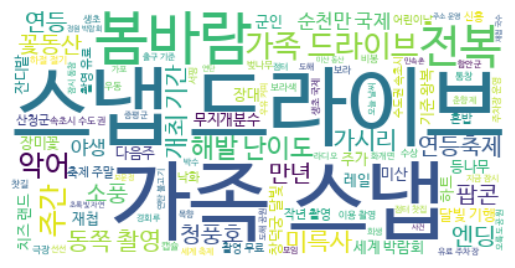

In [556]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[0])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

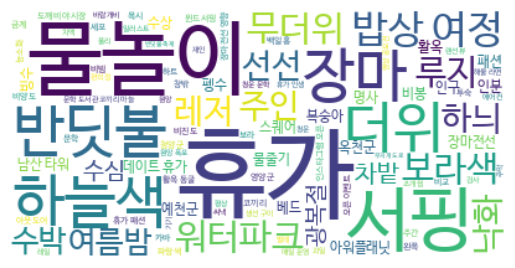

In [557]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[1])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

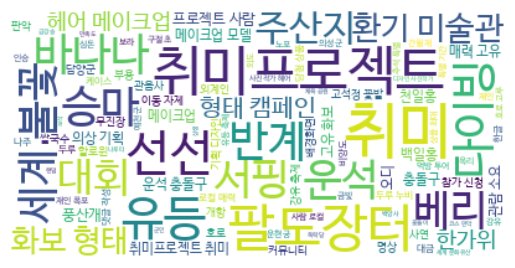

In [558]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[2])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

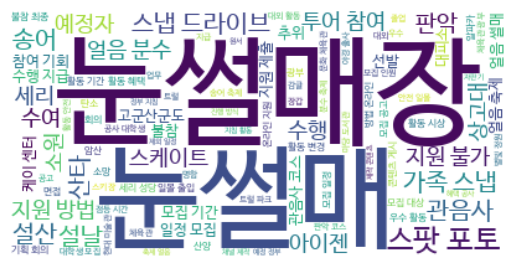

In [559]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[3])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## ÏßÄÏó≠Î≥Ñ ÌÇ§ÏõåÎìú Î∂ÑÏÑù

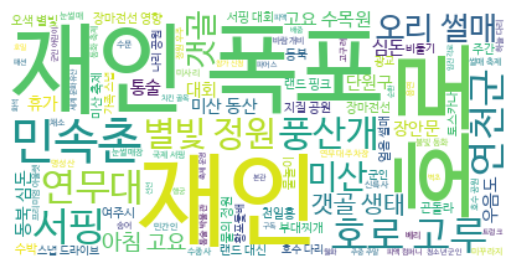

Í≤ΩÍ∏∞


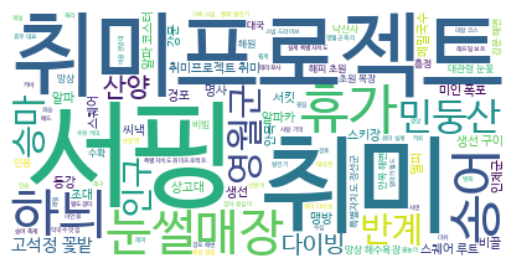

Í∞ïÏõê


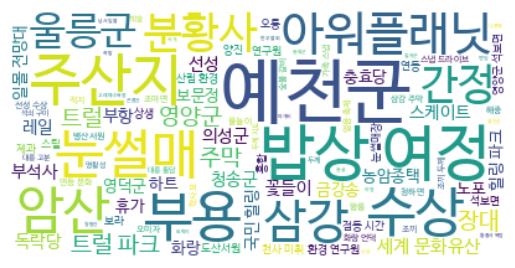

Í≤ΩÎ∂Å


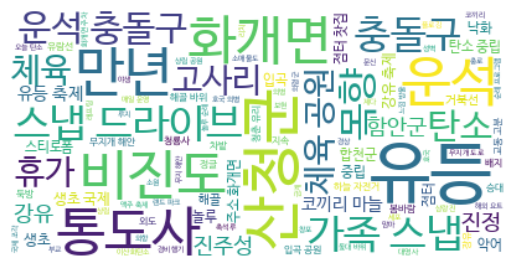

Í≤ΩÎÇ®


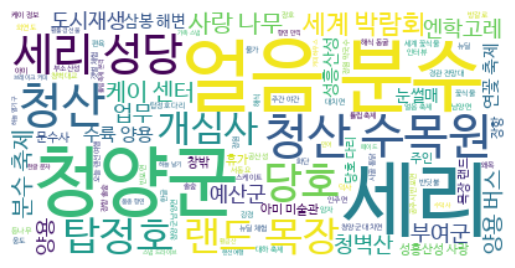

Ï∂©ÎÇ®


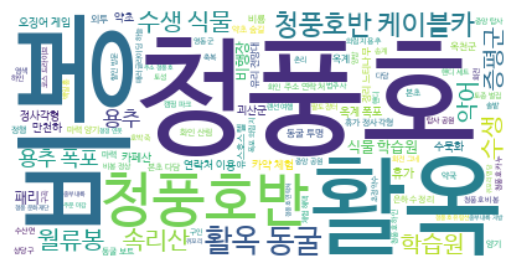

Ï∂©Î∂Å


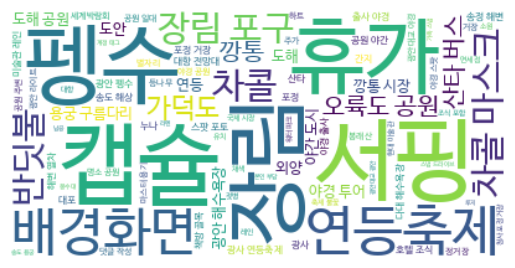

Î∂ÄÏÇ∞


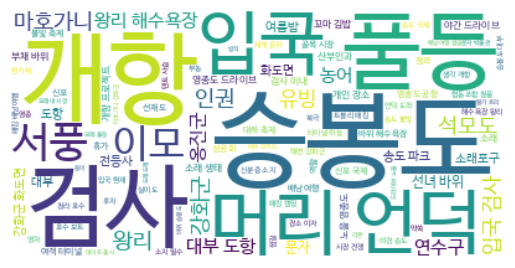

Ïù∏Ï≤ú


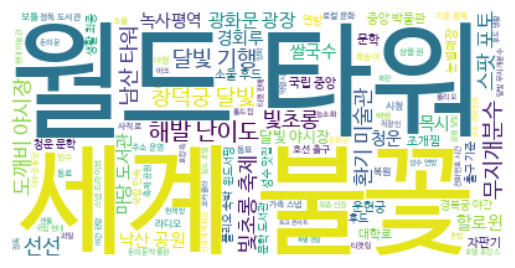

ÏÑúÏö∏


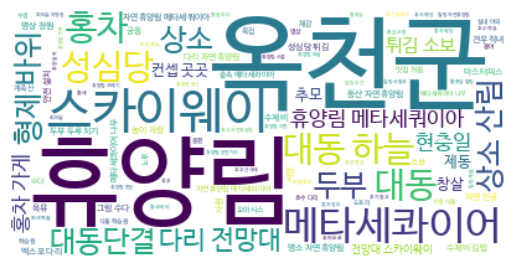

ÎåÄÏ†Ñ


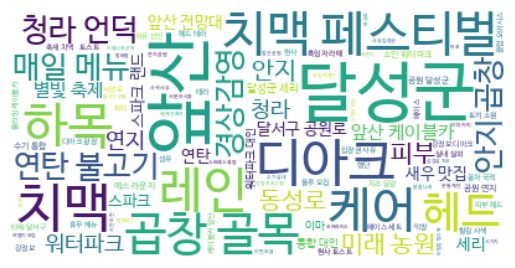

ÎåÄÍµ¨


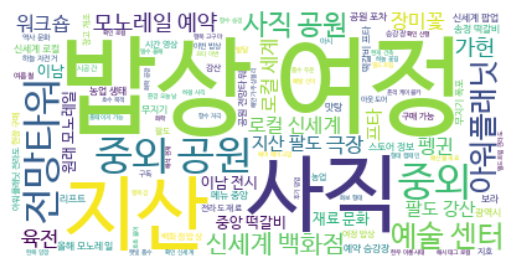

Í¥ëÏ£º


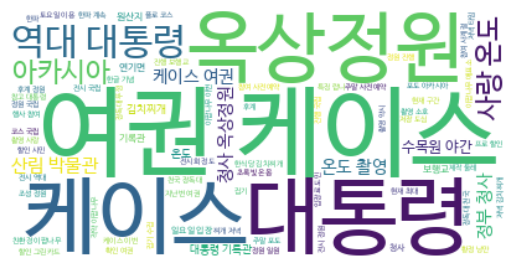

ÏÑ∏Ï¢Ö


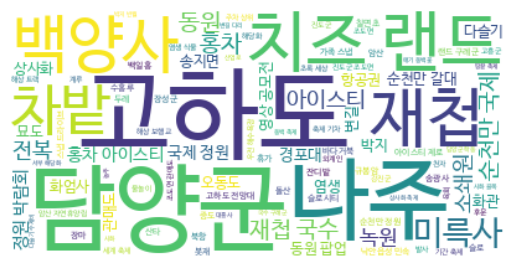

Ï†ÑÎÇ®


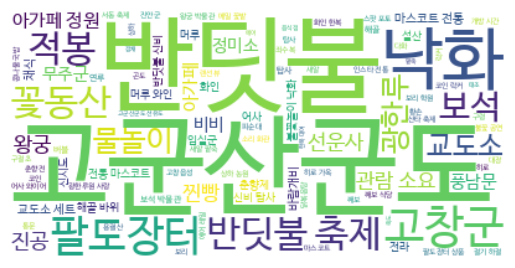

Ï†ÑÎ∂Å


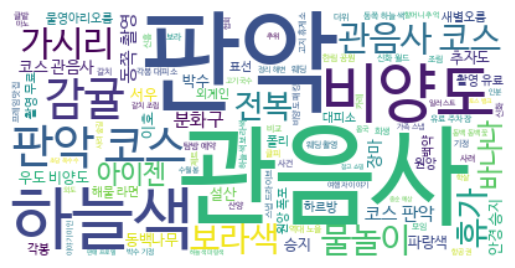

Ï†úÏ£º


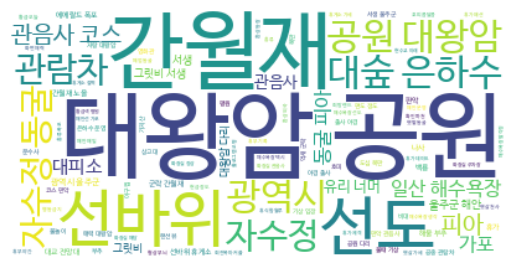

Ïö∏ÏÇ∞


In [590]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
for i in range(len(region_list)):
    wordCloud.generate_from_frequencies(region_list[i])
    wordCloud.words_
    plt.imshow(wordCloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    print(region[i])

## ÍΩÉÍ≥º Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÏùò ÏõîÎ≥Ñ ÎπàÎèÑÏàò
- Î¥Ñ, Í∞ÄÏùÑÏóê ÎπàÎèÑ Ïàò Ï¶ùÍ∞Ä

In [576]:
 pd.pivot_table(df_sns_title, index = "card_month",values="flower_check",aggfunc='sum')

flower_check
card_month              
1                   40.0
10                 134.0
11                 106.0
12                  47.0
2                   52.0
3                  188.0
4                  187.0
5                   74.0
6                   61.0
7                   57.0
8                   68.0
9                   86.0

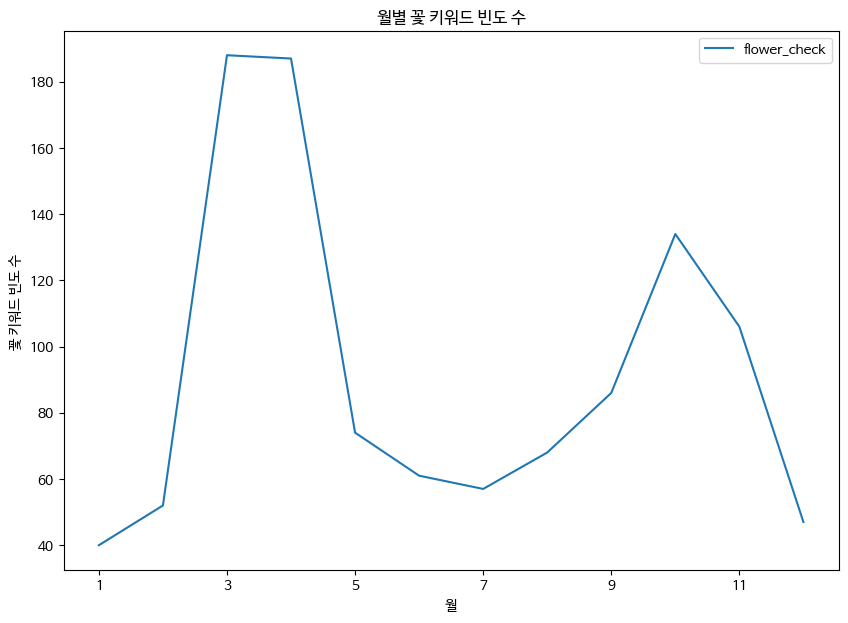

In [577]:
flower_count = pd.pivot_table(df_sns_title, index = "card_month",values="flower_check",aggfunc='sum')
flower_count = flower_count.reindex(['1','2','3','4','5','6','7','8','9','10','11','12'])

# ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
# concept Í∞íÏù¥ 0Ïù∏ Ìñâ Ï†úÍ±∞
# Í∑∏ÎûòÌîÑ Ï†úÎ™©, xÏ∂ï Î†àÏù¥Î∏î, yÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax = flower_count.plot(kind='line', figsize=(10, 7))
plt.title('ÏõîÎ≥Ñ ÍΩÉ ÌÇ§ÏõåÎìú ÎπàÎèÑ Ïàò')
plt.xlabel('Ïõî')
plt.ylabel('ÍΩÉ ÌÇ§ÏõåÎìú ÎπàÎèÑ Ïàò ')

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

## Ï∂ïÏ†úÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÏùò ÏõîÎ≥Ñ ÎπàÎèÑÏàò
- Î¥Ñ, Í∞ÄÏùÑÏóê ÎπàÎèÑ Ïàò Ï¶ùÍ∞Ä

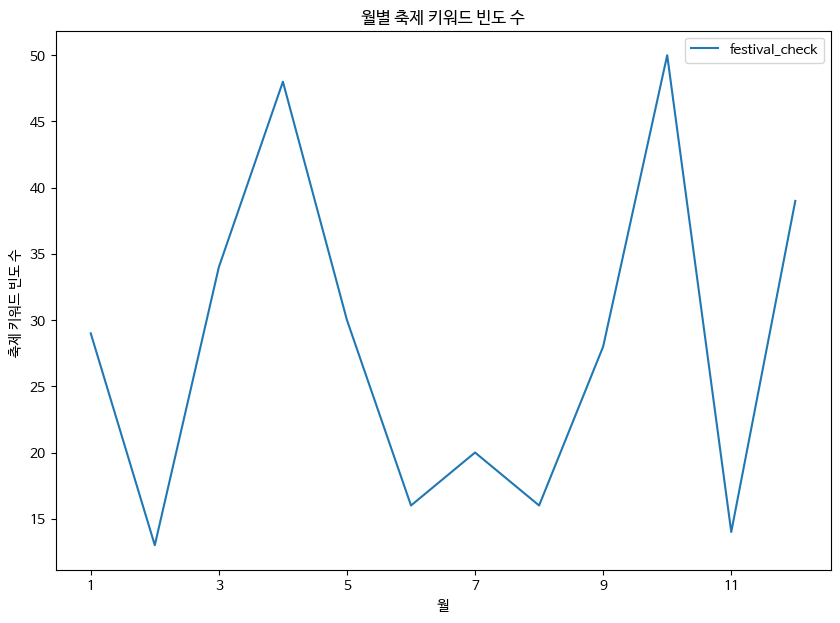

In [580]:
festival_count = pd.pivot_table(df_sns_title, index = "card_month",values="festival_check",aggfunc='sum')
festival_count = festival_count.reindex(['1','2','3','4','5','6','7','8','9','10','11','12'])

# ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
# concept Í∞íÏù¥ 0Ïù∏ Ìñâ Ï†úÍ±∞
# Í∑∏ÎûòÌîÑ Ï†úÎ™©, xÏ∂ï Î†àÏù¥Î∏î, yÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax = festival_count.plot(kind='line', figsize=(10, 7))
plt.title('ÏõîÎ≥Ñ Ï∂ïÏ†ú ÌÇ§ÏõåÎìú ÎπàÎèÑ Ïàò')
plt.xlabel('Ïõî')
plt.ylabel('Ï∂ïÏ†ú ÌÇ§ÏõåÎìú ÎπàÎèÑ Ïàò ')

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

# Í≤∞Î°†
- Î¥Ñ : ÎìúÎùºÏù¥Î∏åÏôÄ ÍΩÉ, Ï∂ïÏ†úÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏùå
- Ïó¨Î¶Ñ : Î¨ºÎÜÄÏù¥, Î£®ÏßÄ, ÏÑúÌïë, ÏõåÌÑ∞ÌååÌÅ¨ÏôÄ Í∞ôÏù¥ Î†àÏ†Ä Ïä§Ìè¨Ï∏†ÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏùå
- Í∞ÄÏùÑ : Ï∑®ÎØ∏ ÌîÑÎ°úÏ†ùÌä∏, ÌåîÎèÑ Ïû•ÌÑ∞, Ïú†Îì±, ÏÑ∏Í≥Ñ Î∂àÍΩÉÍ≥º Í∞ôÏù¥ ÌñâÏÇ¨ÎÇò ÍΩÉÍ≥º Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏùå
- Í≤®Ïö∏ : ÎààÏç∞Îß§, ÏÜ°Ïñ¥ÏôÄ Í∞ôÏù¥ Î†àÏ†Ä Ïä§Ìè¨Ï∏†ÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏùå